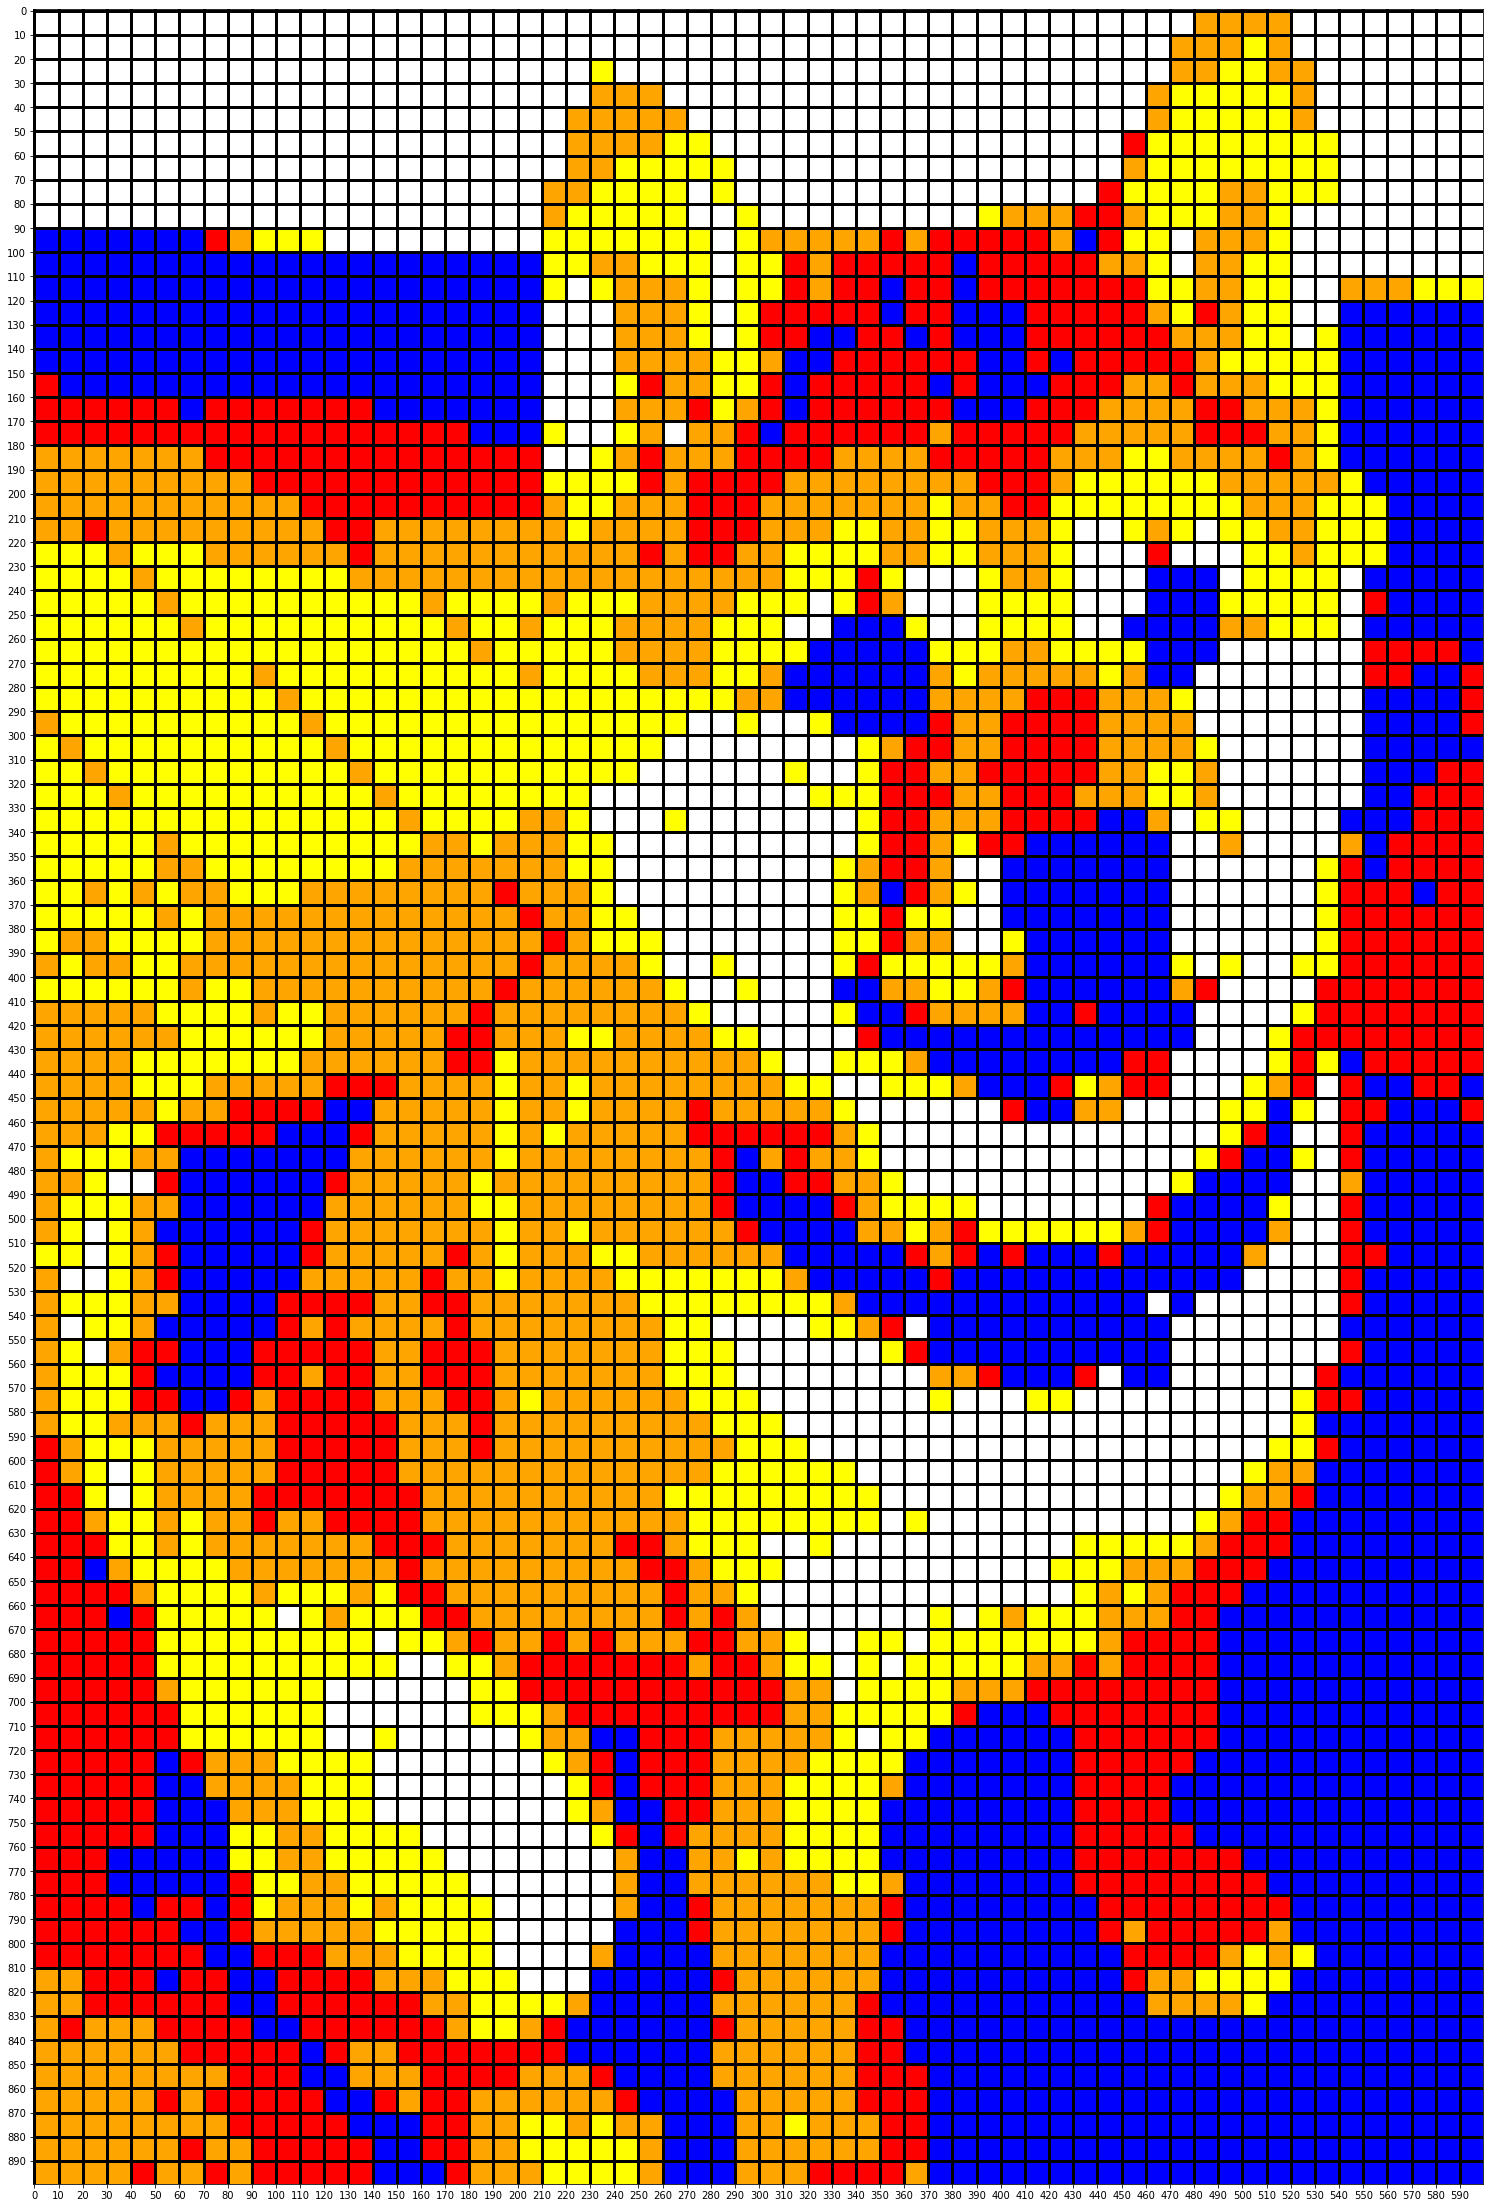

In [2]:
####################################### User Imput #######################################
"""
NOTE: The code below will only show solution for the number of 96(small),150(medium) and 600(large) rubric cubes.
      Using other number of rubric cubes will be adjusted to the highest threshold .
      For example: 94 -> 96, 120 -> 150, 221 -> 600
      The threshold after 600 is more than 100,000,000 cubes according to threshold(), hence it's not included.
      
      Those three numbers are the numbers that will work with the fame 600x900
      The three numbers were obtained from the method threshold()
      
      Say if you wish to use other number of cubes, then you will have to either adjust the fame or threshold().
      The smaller number of cubes, the harder it is to make sense of the portrait.
      
      The image used needs to be png file.
"""

imgPath = '/Users/DouDou/Desktop/RubricPort/img/shiba.png'
rubricCubes = 600  # [96(small), 150(medium), 600(large)]  

##########################################################################################

import numpy as np
from matplotlib import pyplot as plt
import math
import pandas as pd
from PIL import Image

# Error Handling
if rubricCubes < 96:
    rubricCubes = 96

# Turn inported image into grayscale, resize the image, then turn it into numpy arrays to make image arrray mutable.
getImg = Image.open(imgPath)
imgResize = getImg.resize((600, 900), Image.ANTIALIAS)
myImg = np.array(imgResize)
myImgHD = np.array(imgResize)

# Available paint colors to paint on top of the original image.
# The color green is excluded because green does not look good on portraits according to "color theory".
pallete = {
    "blue":0,
    "red":0,
    "orange":0,
    "yellow":0,
    "white":0
}
    
size = int(math.sqrt(60000/rubricCubes))

#Threshold based on the fame 600 x 900.
def threshold():
    num=[]
    dummySize = 25
    for x in range(95,100000000):
        val = int(math.sqrt(60000/x))
        if val%5 == 0:
            if val%3 != 0:
                if val == dummySize:
                    biggestVal = x
                else:
                    dummySize = val
                    num.append(biggestVal)
    return(num)


# Draw the result after transform()
def draw(image):
    plt.figure(figsize=(40,40))
    plt.xticks(range(0,600,size))
    plt.yticks(range(0,900,size))
    plt.imshow(image,cmap=plt.get_cmap('gray'))
    plt.grid(True, "both", linewidth="3", color='black')
    #plt.savefig("shiba600.png") #Uncomment if you want to save image
    plt.imshow(image)

# Turn the RGB image array into grayscale values
def rgb2gray(rgb):
    return np.dot(rgb[...,:3], [0.2989, 0.5870, 0.1140])
   
# Turn an image into rubric portrait
def transform():
    a,b = 0,size+1
    c,d = 1,size+1

    grayImg = rgb2gray(myImg)
    
    while d < 700:
        while b < 1000:
            data = grayImg[a:b, c:d]
            
            for groupData in data: # Extract array based of the location of data
                for listData in groupData: # Extract the grayscale value in the array.

                    # Increase the value of the pallette dictionary key based on the grayscale value
                    if int(listData) > 0 and int(listData) <= 91:
                        pallete["blue"] += 1
                    if int(listData) > 91 and int(listData) <= 121:
                        pallete["red"] += 1
                    if int(listData) > 121 and int(listData) <= 151:
                        pallete["orange"] += 1
                    if int(listData) > 151 and int(listData) <= 180:
                        pallete["yellow"] += 1
                    if int(listData) > 180 and int(listData) <= 255:
                        pallete["white"] += 1
                    else:
                        continue
                        
                # Find the key that has the highest value in the pallette dictionary and paint the entire 
                # location, aka data[a:b, c:d], with the most occuring color, aka the dominant color.
                dominant = max(pallete, key=pallete.get)
                if dominant == "blue":
                     myImg[a:b, c:d] = np.array([0, 0, 255,255])
                if dominant == "red":
                     myImg[a:b, c:d] = np.array([255, 0, 0,255])
                if dominant == "orange":
                     myImg[a:b, c:d] = np.array([255,165,0,255])
                if dominant == "yellow":
                     myImg[a:b, c:d] = np.array([255, 255, 0,255])
                if dominant == "white":
                     myImg[a:b, c:d] = np.array([255,255,255,255])
                
                # Reset the dictionary value for the next location. 
                pallete["blue"] = 0
                pallete["red"] = 0
                pallete["orange"] = 0
                pallete["yellow"] = 0
                pallete["white"] = 0

            a,b = a-a+b, b+size
    
        a,b = 1, size+1
        c,d = c-c+d, d+size
        
# Scan through the result from transform(), 3x3 at a time starting from the bottom row left to right.
# This is to follow the result more easily when actually building the portrait. 
def step():
    area = size*3
    a,b = 900-area,900
    c,d = 1,area
    rubric = 1
    row = 1
    print(area, size)
    
    while a >= 0:
        while d < 605:
            
            print("row: ", row)
            print("rubric: ", rubric)
            print("location:", a,b,c,d)
            x = myImg[a:b, c:d]
            plt.xticks(range(0,area+size,size))
            plt.yticks(range(0,area+size,size))
            plt.grid(True, "both", linewidth="3", color='black')
            plt.imshow(x)
            plt.show()
            rubric += 1

            c,d = c-c+d, d+area
            
        row += 1
        c,d = 1,area
        b,a = b-b+a, a-area
        
transform()
draw(myImg)

In [9]:
threshold()

[96, 150, 600]

30 10
row:  1
rubric:  1
location: 870 900 1 30


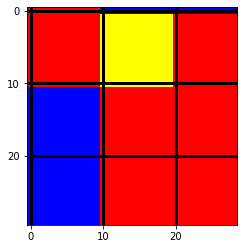

row:  1
rubric:  2
location: 870 900 30 60


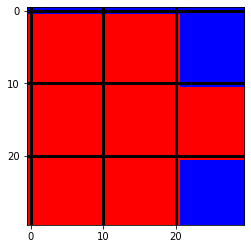

row:  1
rubric:  3
location: 870 900 60 90


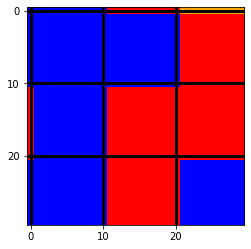

row:  1
rubric:  4
location: 870 900 90 120


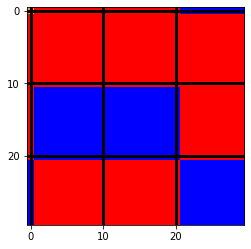

row:  1
rubric:  5
location: 870 900 120 150


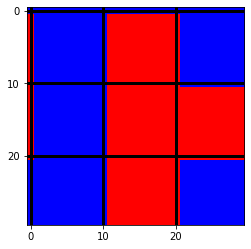

row:  1
rubric:  6
location: 870 900 150 180


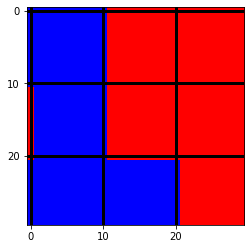

row:  1
rubric:  7
location: 870 900 180 210


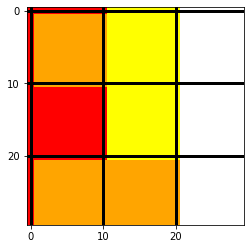

row:  1
rubric:  8
location: 870 900 210 240


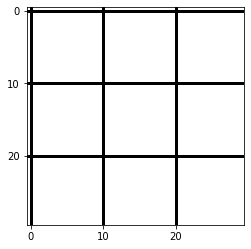

row:  1
rubric:  9
location: 870 900 240 270


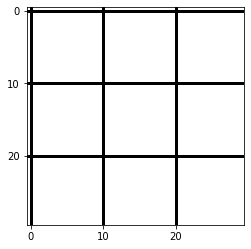

row:  1
rubric:  10
location: 870 900 270 300


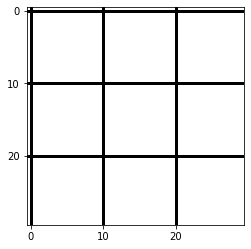

row:  1
rubric:  11
location: 870 900 300 330


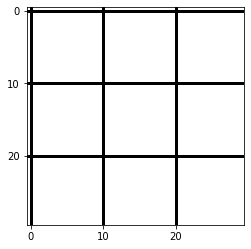

row:  1
rubric:  12
location: 870 900 330 360


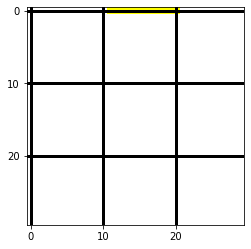

row:  1
rubric:  13
location: 870 900 360 390


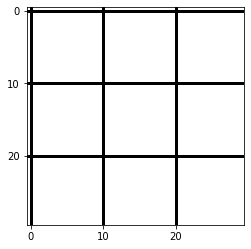

row:  1
rubric:  14
location: 870 900 390 420


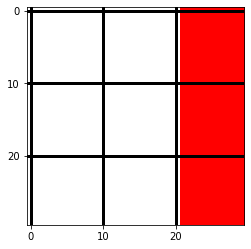

row:  1
rubric:  15
location: 870 900 420 450


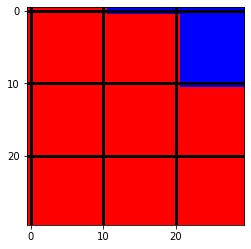

row:  1
rubric:  16
location: 870 900 450 480


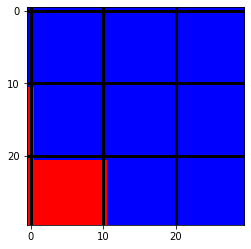

row:  1
rubric:  17
location: 870 900 480 510


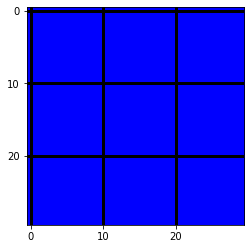

row:  1
rubric:  18
location: 870 900 510 540


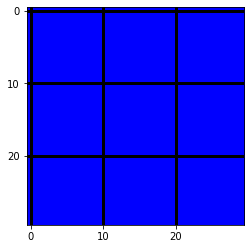

row:  1
rubric:  19
location: 870 900 540 570


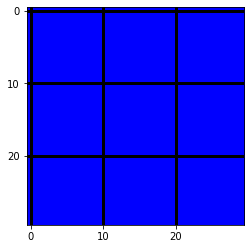

row:  1
rubric:  20
location: 870 900 570 600


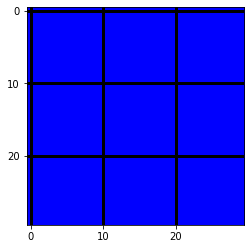

row:  2
rubric:  21
location: 840 870 1 30


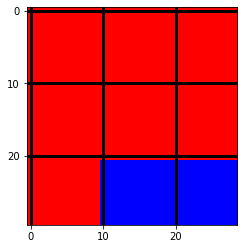

row:  2
rubric:  22
location: 840 870 30 60


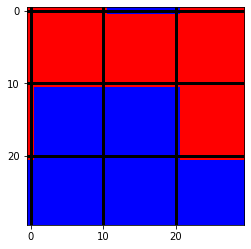

row:  2
rubric:  23
location: 840 870 60 90


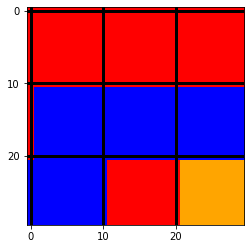

row:  2
rubric:  24
location: 840 870 90 120


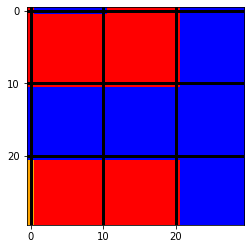

row:  2
rubric:  25
location: 840 870 120 150


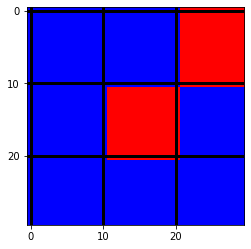

row:  2
rubric:  26
location: 840 870 150 180


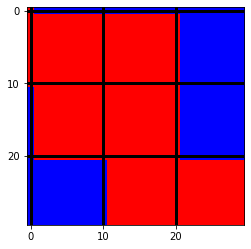

row:  2
rubric:  27
location: 840 870 180 210


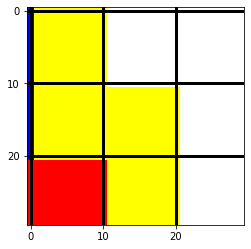

row:  2
rubric:  28
location: 840 870 210 240


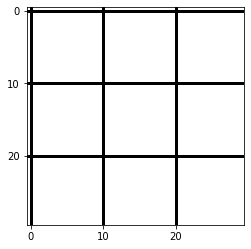

row:  2
rubric:  29
location: 840 870 240 270


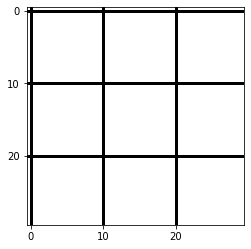

row:  2
rubric:  30
location: 840 870 270 300


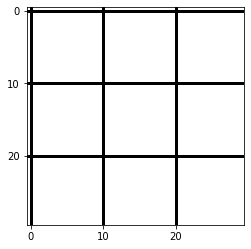

row:  2
rubric:  31
location: 840 870 300 330


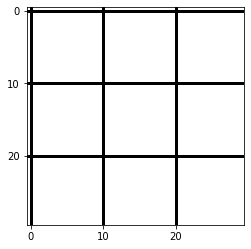

row:  2
rubric:  32
location: 840 870 330 360


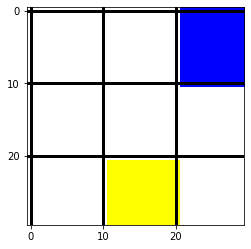

row:  2
rubric:  33
location: 840 870 360 390


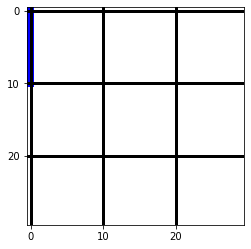

row:  2
rubric:  34
location: 840 870 390 420


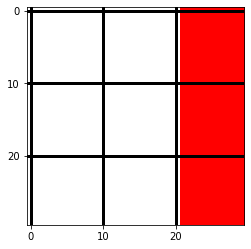

row:  2
rubric:  35
location: 840 870 420 450


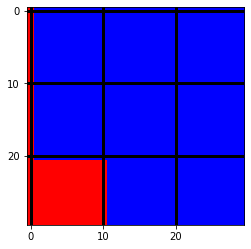

row:  2
rubric:  36
location: 840 870 450 480


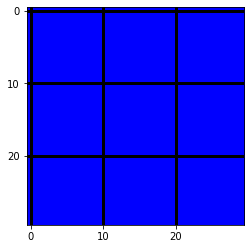

row:  2
rubric:  37
location: 840 870 480 510


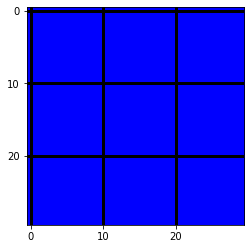

row:  2
rubric:  38
location: 840 870 510 540


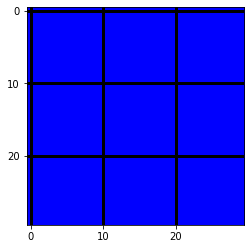

row:  2
rubric:  39
location: 840 870 540 570


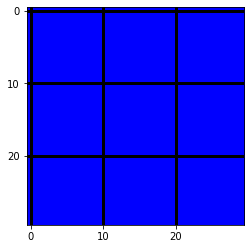

row:  2
rubric:  40
location: 840 870 570 600


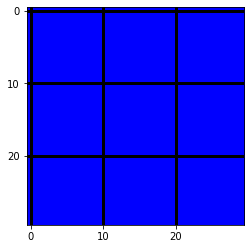

row:  3
rubric:  41
location: 810 840 1 30


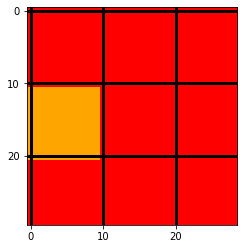

row:  3
rubric:  42
location: 810 840 30 60


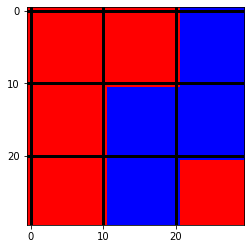

row:  3
rubric:  43
location: 810 840 60 90


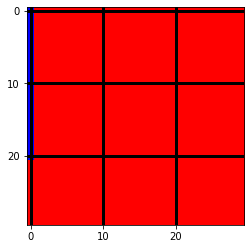

row:  3
rubric:  44
location: 810 840 90 120


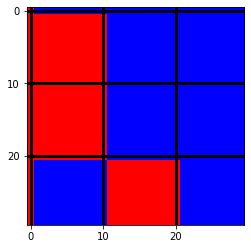

row:  3
rubric:  45
location: 810 840 120 150


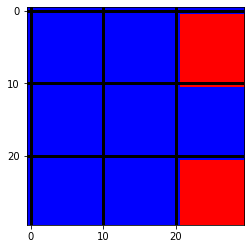

row:  3
rubric:  46
location: 810 840 150 180


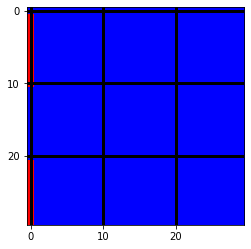

row:  3
rubric:  47
location: 810 840 180 210


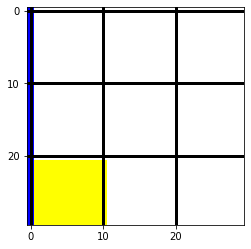

row:  3
rubric:  48
location: 810 840 210 240


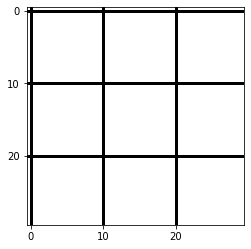

row:  3
rubric:  49
location: 810 840 240 270


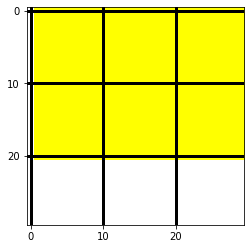

row:  3
rubric:  50
location: 810 840 270 300


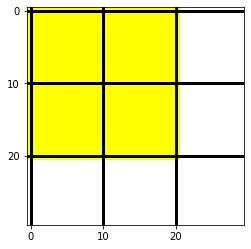

row:  3
rubric:  51
location: 810 840 300 330


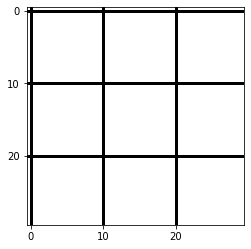

row:  3
rubric:  52
location: 810 840 330 360


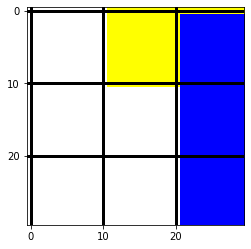

row:  3
rubric:  53
location: 810 840 360 390


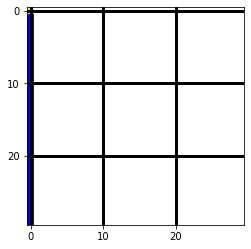

row:  3
rubric:  54
location: 810 840 390 420


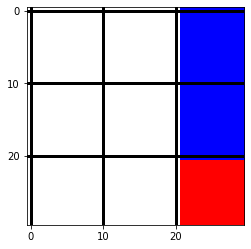

row:  3
rubric:  55
location: 810 840 420 450


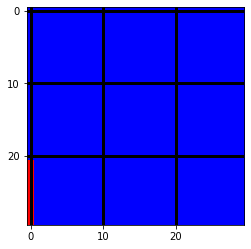

row:  3
rubric:  56
location: 810 840 450 480


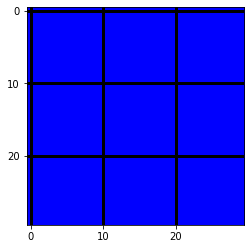

row:  3
rubric:  57
location: 810 840 480 510


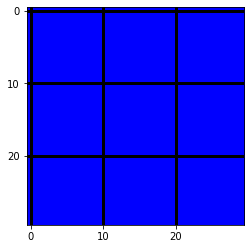

row:  3
rubric:  58
location: 810 840 510 540


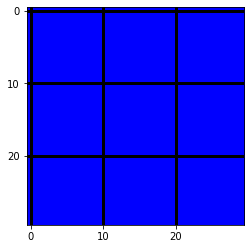

row:  3
rubric:  59
location: 810 840 540 570


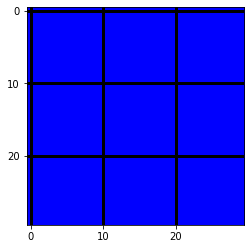

row:  3
rubric:  60
location: 810 840 570 600


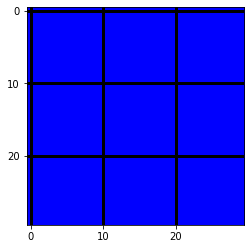

row:  4
rubric:  61
location: 780 810 1 30


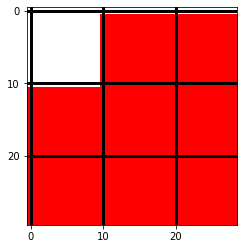

row:  4
rubric:  62
location: 780 810 30 60


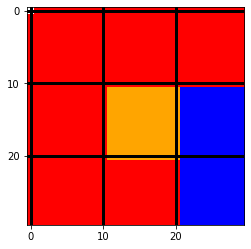

row:  4
rubric:  63
location: 780 810 60 90


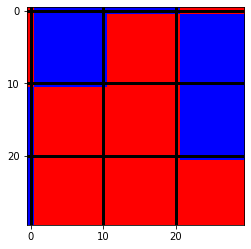

row:  4
rubric:  64
location: 780 810 90 120


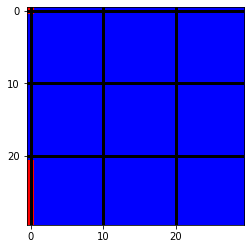

row:  4
rubric:  65
location: 780 810 120 150


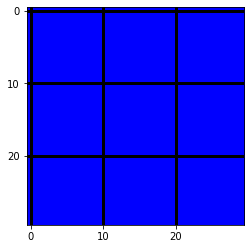

row:  4
rubric:  66
location: 780 810 150 180


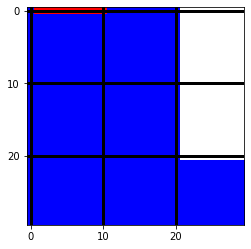

row:  4
rubric:  67
location: 780 810 180 210


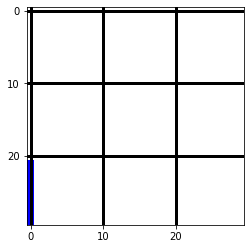

row:  4
rubric:  68
location: 780 810 210 240


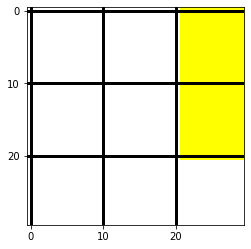

row:  4
rubric:  69
location: 780 810 240 270


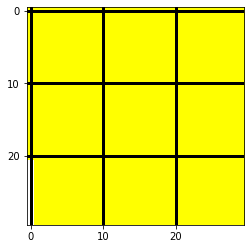

row:  4
rubric:  70
location: 780 810 270 300


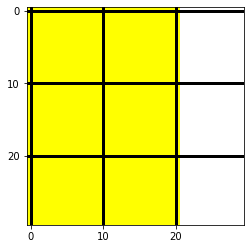

row:  4
rubric:  71
location: 780 810 300 330


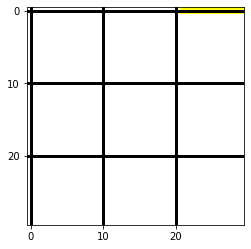

row:  4
rubric:  72
location: 780 810 330 360


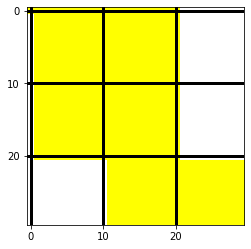

row:  4
rubric:  73
location: 780 810 360 390


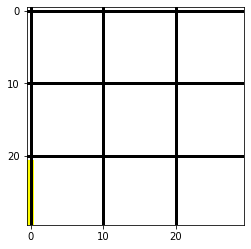

row:  4
rubric:  74
location: 780 810 390 420


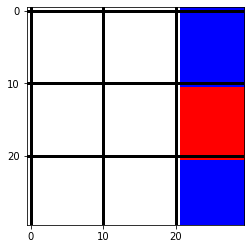

row:  4
rubric:  75
location: 780 810 420 450


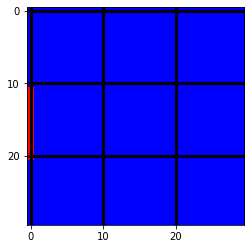

row:  4
rubric:  76
location: 780 810 450 480


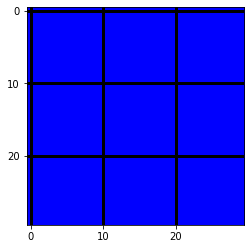

row:  4
rubric:  77
location: 780 810 480 510


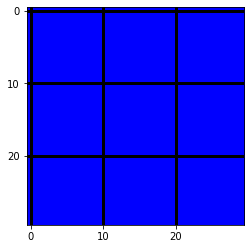

row:  4
rubric:  78
location: 780 810 510 540


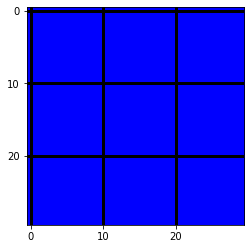

row:  4
rubric:  79
location: 780 810 540 570


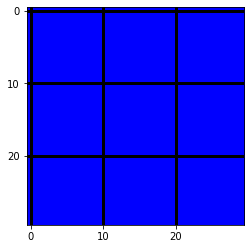

row:  4
rubric:  80
location: 780 810 570 600


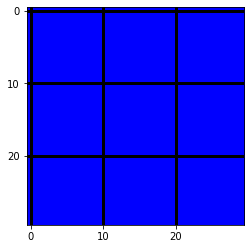

row:  5
rubric:  81
location: 750 780 1 30


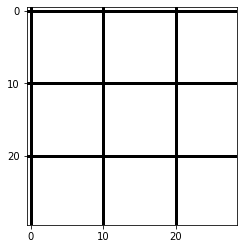

row:  5
rubric:  82
location: 750 780 30 60


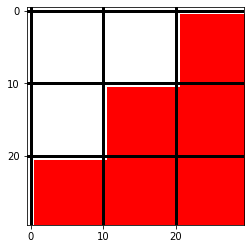

row:  5
rubric:  83
location: 750 780 60 90


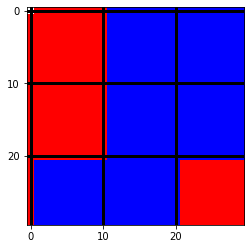

row:  5
rubric:  84
location: 750 780 90 120


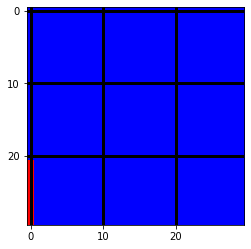

row:  5
rubric:  85
location: 750 780 120 150


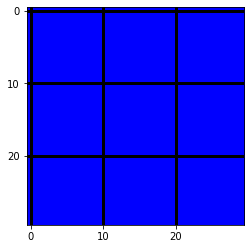

row:  5
rubric:  86
location: 750 780 150 180


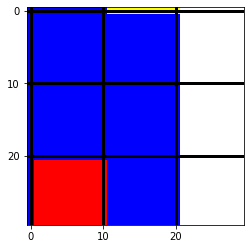

row:  5
rubric:  87
location: 750 780 180 210


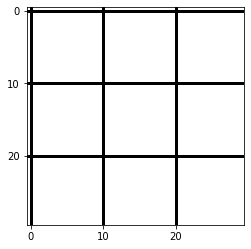

row:  5
rubric:  88
location: 750 780 210 240


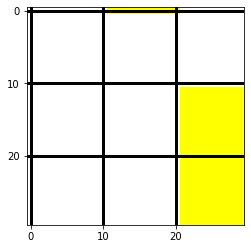

row:  5
rubric:  89
location: 750 780 240 270


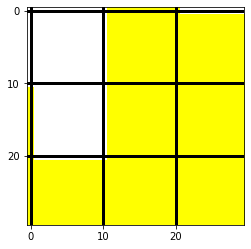

row:  5
rubric:  90
location: 750 780 270 300


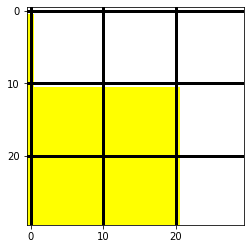

row:  5
rubric:  91
location: 750 780 300 330


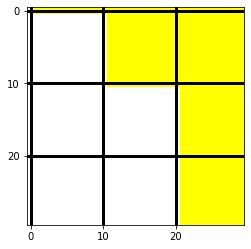

row:  5
rubric:  92
location: 750 780 330 360


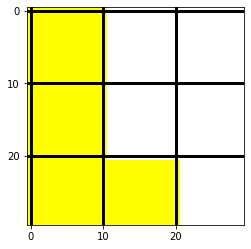

row:  5
rubric:  93
location: 750 780 360 390


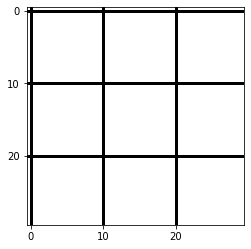

row:  5
rubric:  94
location: 750 780 390 420


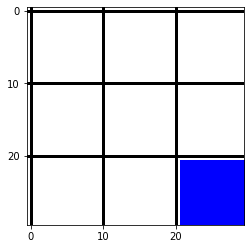

row:  5
rubric:  95
location: 750 780 420 450


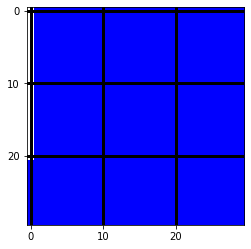

row:  5
rubric:  96
location: 750 780 450 480


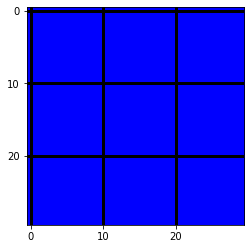

row:  5
rubric:  97
location: 750 780 480 510


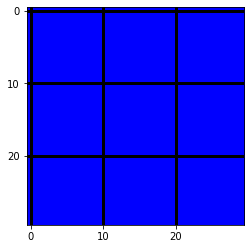

row:  5
rubric:  98
location: 750 780 510 540


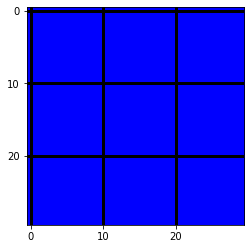

row:  5
rubric:  99
location: 750 780 540 570


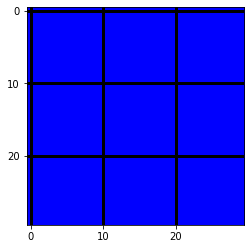

row:  5
rubric:  100
location: 750 780 570 600


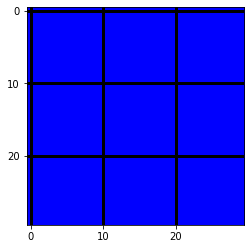

row:  6
rubric:  101
location: 720 750 1 30


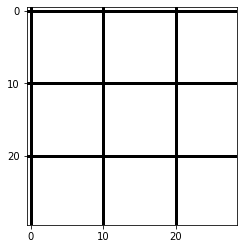

row:  6
rubric:  102
location: 720 750 30 60


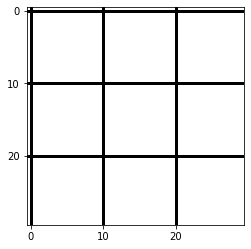

row:  6
rubric:  103
location: 720 750 60 90


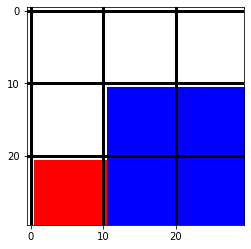

row:  6
rubric:  104
location: 720 750 90 120


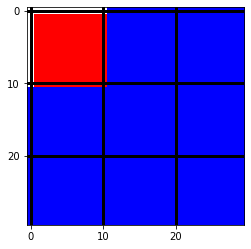

row:  6
rubric:  105
location: 720 750 120 150


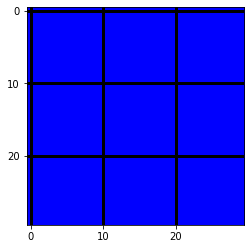

row:  6
rubric:  106
location: 720 750 150 180


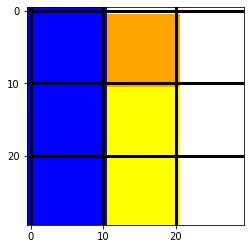

row:  6
rubric:  107
location: 720 750 180 210


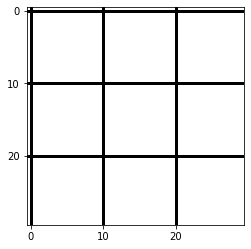

row:  6
rubric:  108
location: 720 750 210 240


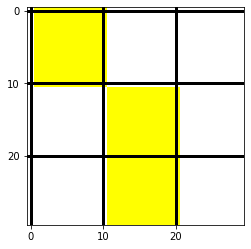

row:  6
rubric:  109
location: 720 750 240 270


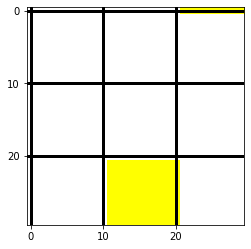

row:  6
rubric:  110
location: 720 750 270 300


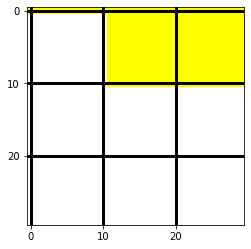

row:  6
rubric:  111
location: 720 750 300 330


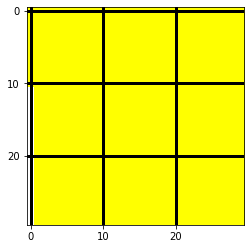

row:  6
rubric:  112
location: 720 750 330 360


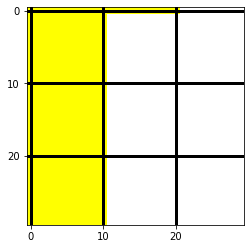

row:  6
rubric:  113
location: 720 750 360 390


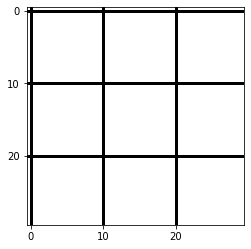

row:  6
rubric:  114
location: 720 750 390 420


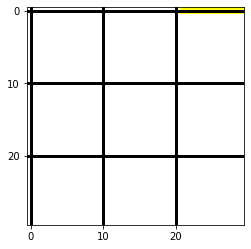

row:  6
rubric:  115
location: 720 750 420 450


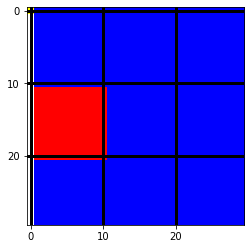

row:  6
rubric:  116
location: 720 750 450 480


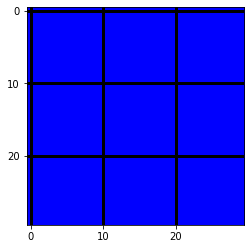

row:  6
rubric:  117
location: 720 750 480 510


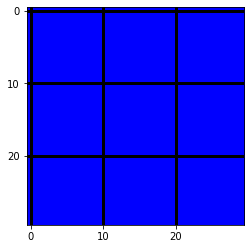

row:  6
rubric:  118
location: 720 750 510 540


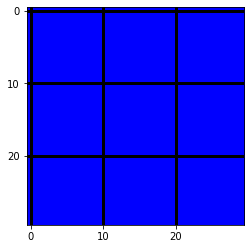

row:  6
rubric:  119
location: 720 750 540 570


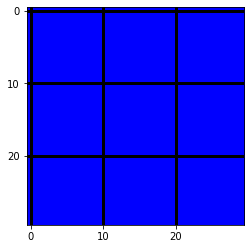

row:  6
rubric:  120
location: 720 750 570 600


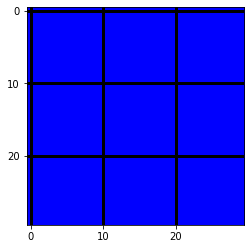

row:  7
rubric:  121
location: 690 720 1 30


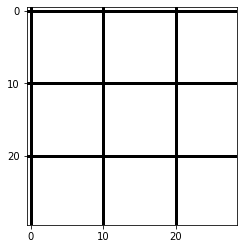

row:  7
rubric:  122
location: 690 720 30 60


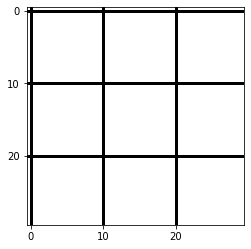

row:  7
rubric:  123
location: 690 720 60 90


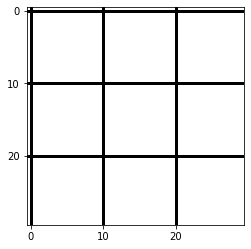

row:  7
rubric:  124
location: 690 720 90 120


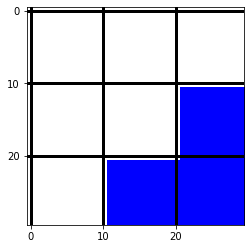

row:  7
rubric:  125
location: 690 720 120 150


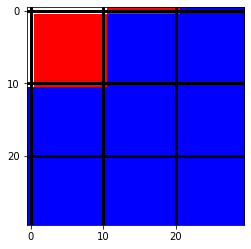

row:  7
rubric:  126
location: 690 720 150 180


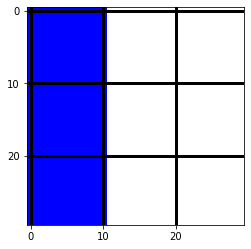

row:  7
rubric:  127
location: 690 720 180 210


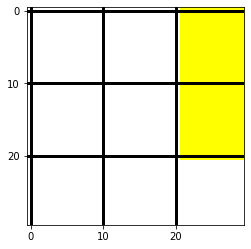

row:  7
rubric:  128
location: 690 720 210 240


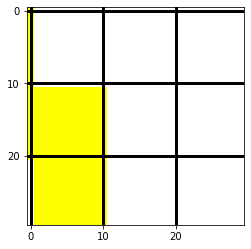

row:  7
rubric:  129
location: 690 720 240 270


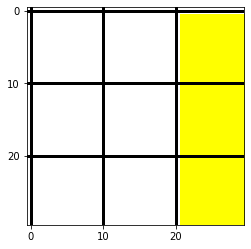

row:  7
rubric:  130
location: 690 720 270 300


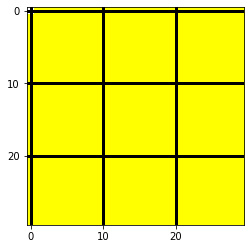

row:  7
rubric:  131
location: 690 720 300 330


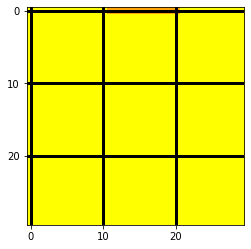

row:  7
rubric:  132
location: 690 720 330 360


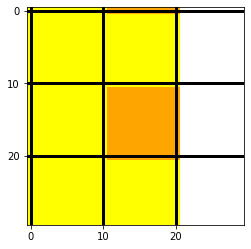

row:  7
rubric:  133
location: 690 720 360 390


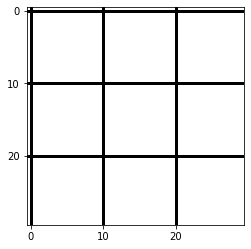

row:  7
rubric:  134
location: 690 720 390 420


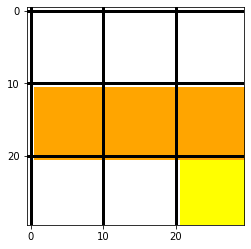

row:  7
rubric:  135
location: 690 720 420 450


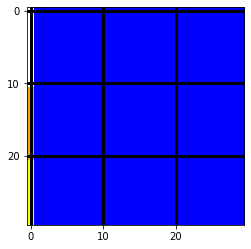

row:  7
rubric:  136
location: 690 720 450 480


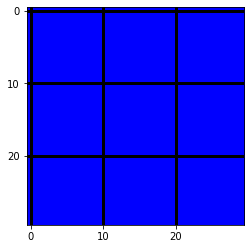

row:  7
rubric:  137
location: 690 720 480 510


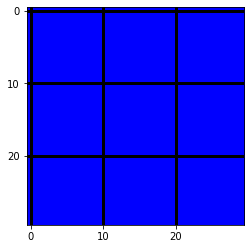

row:  7
rubric:  138
location: 690 720 510 540


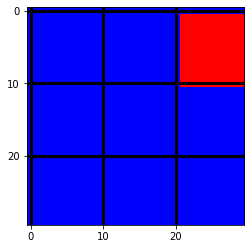

row:  7
rubric:  139
location: 690 720 540 570


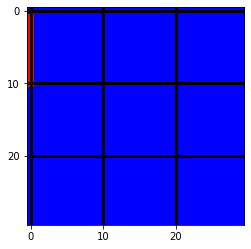

row:  7
rubric:  140
location: 690 720 570 600


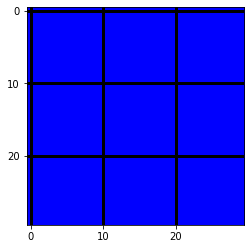

row:  8
rubric:  141
location: 660 690 1 30


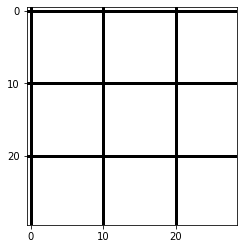

row:  8
rubric:  142
location: 660 690 30 60


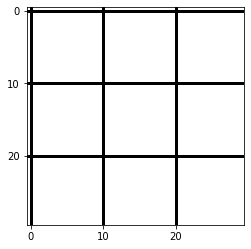

row:  8
rubric:  143
location: 660 690 60 90


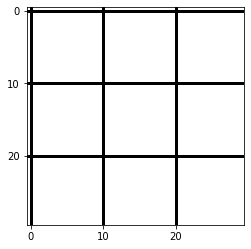

row:  8
rubric:  144
location: 660 690 90 120


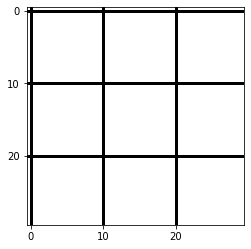

row:  8
rubric:  145
location: 660 690 120 150


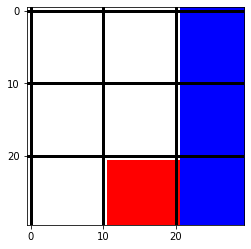

row:  8
rubric:  146
location: 660 690 150 180


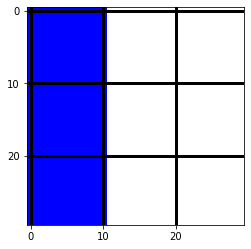

row:  8
rubric:  147
location: 660 690 180 210


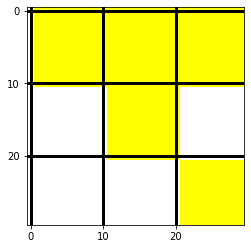

row:  8
rubric:  148
location: 660 690 210 240


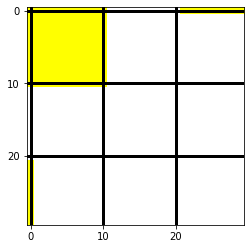

row:  8
rubric:  149
location: 660 690 240 270


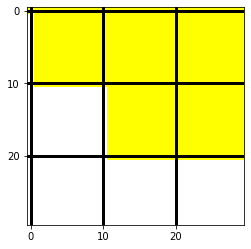

row:  8
rubric:  150
location: 660 690 270 300


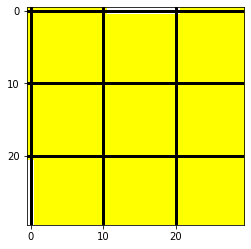

row:  8
rubric:  151
location: 660 690 300 330


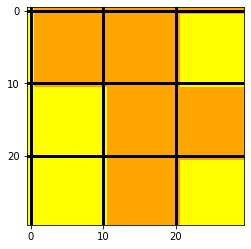

row:  8
rubric:  152
location: 660 690 330 360


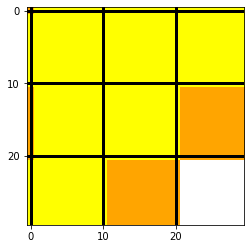

row:  8
rubric:  153
location: 660 690 360 390


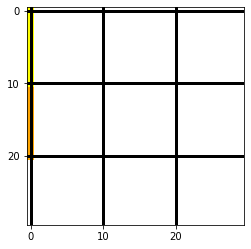

row:  8
rubric:  154
location: 660 690 390 420


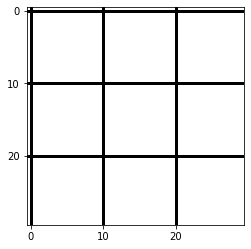

row:  8
rubric:  155
location: 660 690 420 450


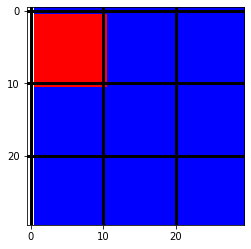

row:  8
rubric:  156
location: 660 690 450 480


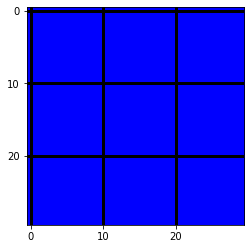

row:  8
rubric:  157
location: 660 690 480 510


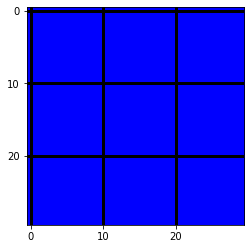

row:  8
rubric:  158
location: 660 690 510 540


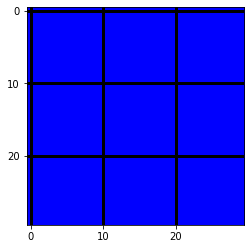

row:  8
rubric:  159
location: 660 690 540 570


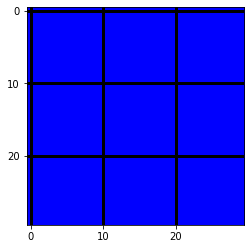

row:  8
rubric:  160
location: 660 690 570 600


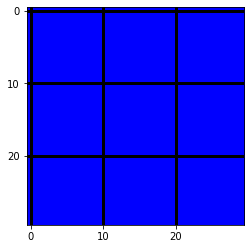

row:  9
rubric:  161
location: 630 660 1 30


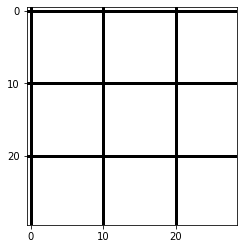

row:  9
rubric:  162
location: 630 660 30 60


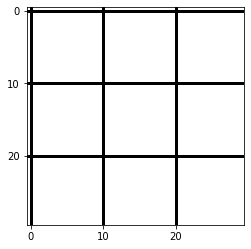

row:  9
rubric:  163
location: 630 660 60 90


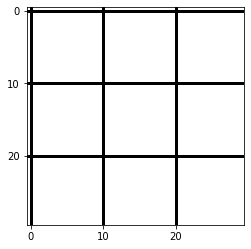

row:  9
rubric:  164
location: 630 660 90 120


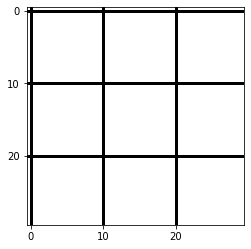

row:  9
rubric:  165
location: 630 660 120 150


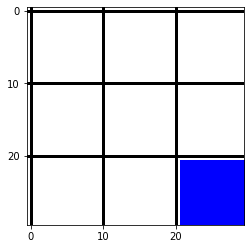

row:  9
rubric:  166
location: 630 660 150 180


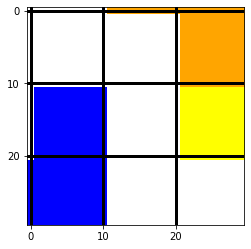

row:  9
rubric:  167
location: 630 660 180 210


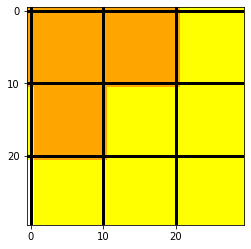

row:  9
rubric:  168
location: 630 660 210 240


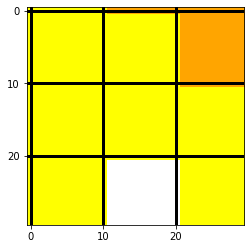

row:  9
rubric:  169
location: 630 660 240 270


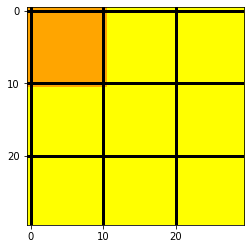

row:  9
rubric:  170
location: 630 660 270 300


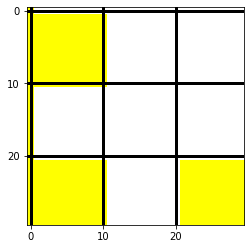

row:  9
rubric:  171
location: 630 660 300 330


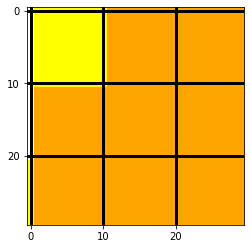

row:  9
rubric:  172
location: 630 660 330 360


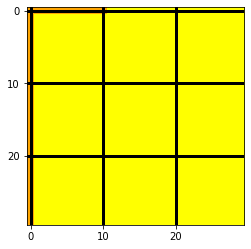

row:  9
rubric:  173
location: 630 660 360 390


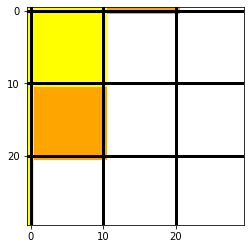

row:  9
rubric:  174
location: 630 660 390 420


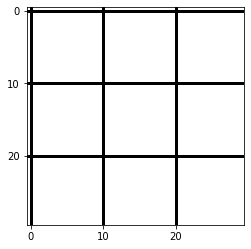

row:  9
rubric:  175
location: 630 660 420 450


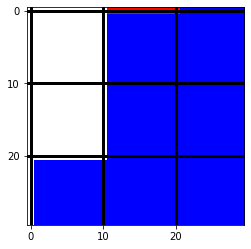

row:  9
rubric:  176
location: 630 660 450 480


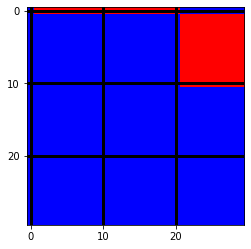

row:  9
rubric:  177
location: 630 660 480 510


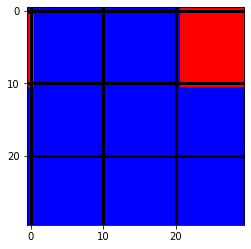

row:  9
rubric:  178
location: 630 660 510 540


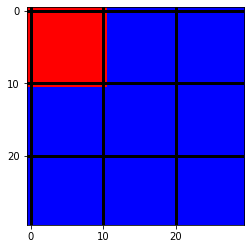

row:  9
rubric:  179
location: 630 660 540 570


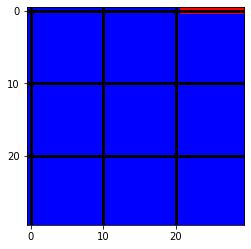

row:  9
rubric:  180
location: 630 660 570 600


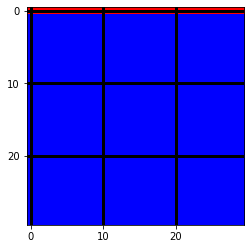

row:  10
rubric:  181
location: 600 630 1 30


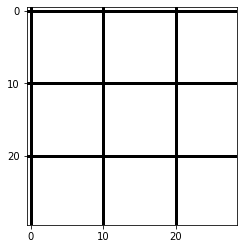

row:  10
rubric:  182
location: 600 630 30 60


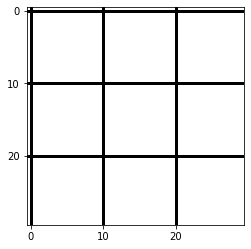

row:  10
rubric:  183
location: 600 630 60 90


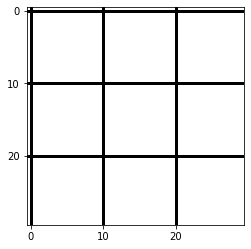

row:  10
rubric:  184
location: 600 630 90 120


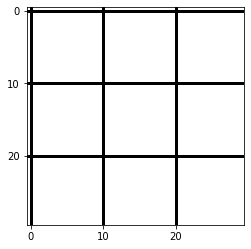

row:  10
rubric:  185
location: 600 630 120 150


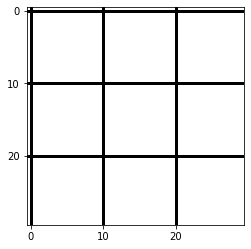

row:  10
rubric:  186
location: 600 630 150 180


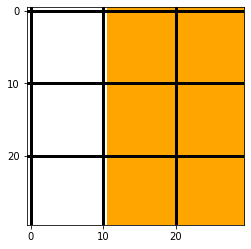

row:  10
rubric:  187
location: 600 630 180 210


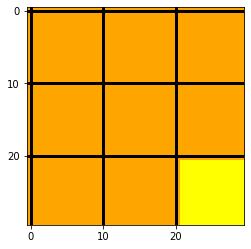

row:  10
rubric:  188
location: 600 630 210 240


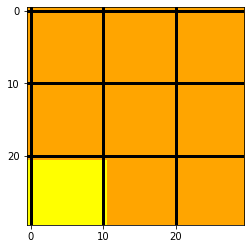

row:  10
rubric:  189
location: 600 630 240 270


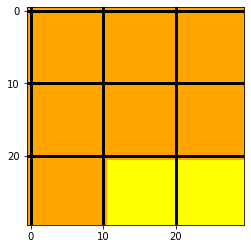

row:  10
rubric:  190
location: 600 630 270 300


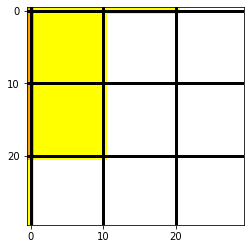

row:  10
rubric:  191
location: 600 630 300 330


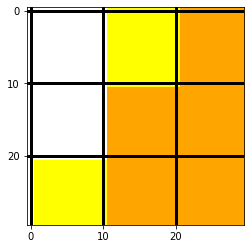

row:  10
rubric:  192
location: 600 630 330 360


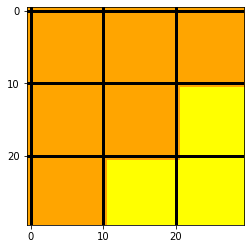

row:  10
rubric:  193
location: 600 630 360 390


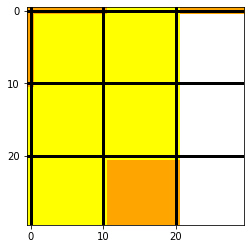

row:  10
rubric:  194
location: 600 630 390 420


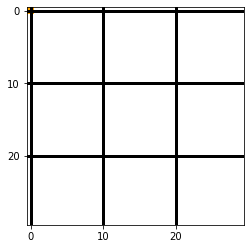

row:  10
rubric:  195
location: 600 630 420 450


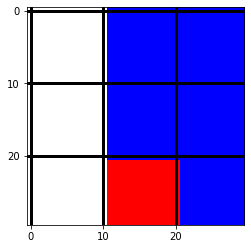

row:  10
rubric:  196
location: 600 630 450 480


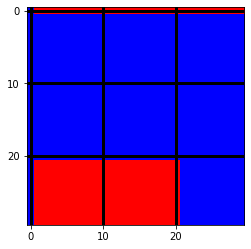

row:  10
rubric:  197
location: 600 630 480 510


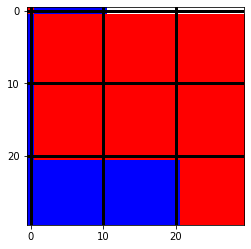

row:  10
rubric:  198
location: 600 630 510 540


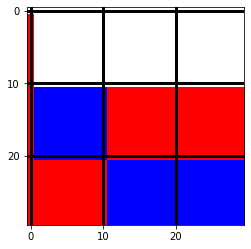

row:  10
rubric:  199
location: 600 630 540 570


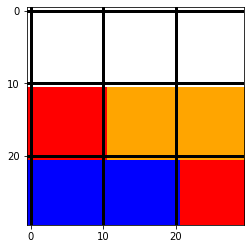

row:  10
rubric:  200
location: 600 630 570 600


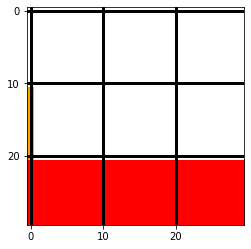

row:  11
rubric:  201
location: 570 600 1 30


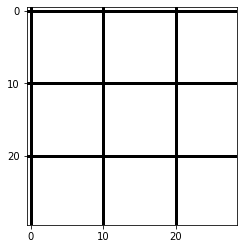

row:  11
rubric:  202
location: 570 600 30 60


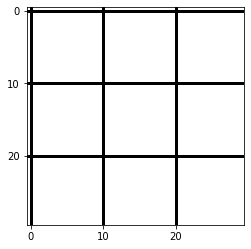

row:  11
rubric:  203
location: 570 600 60 90


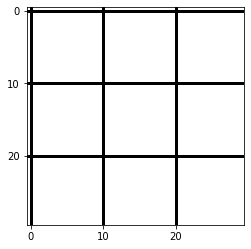

row:  11
rubric:  204
location: 570 600 90 120


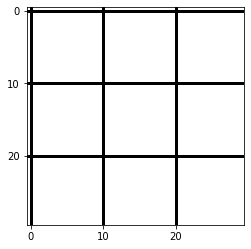

row:  11
rubric:  205
location: 570 600 120 150


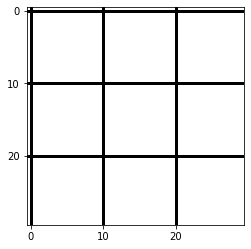

row:  11
rubric:  206
location: 570 600 150 180


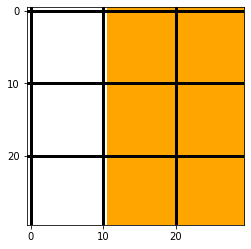

row:  11
rubric:  207
location: 570 600 180 210


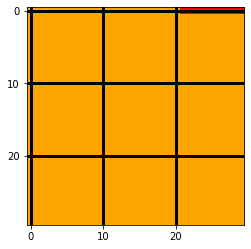

row:  11
rubric:  208
location: 570 600 210 240


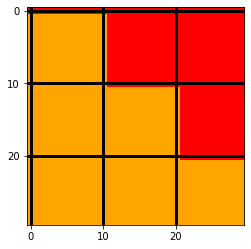

row:  11
rubric:  209
location: 570 600 240 270


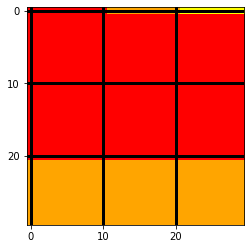

row:  11
rubric:  210
location: 570 600 270 300


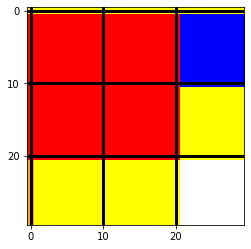

row:  11
rubric:  211
location: 570 600 300 330


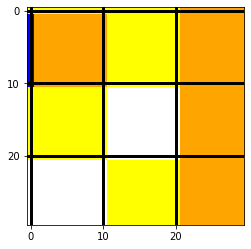

row:  11
rubric:  212
location: 570 600 330 360


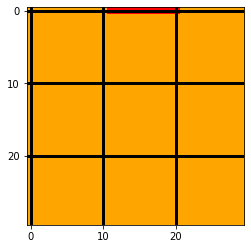

row:  11
rubric:  213
location: 570 600 360 390


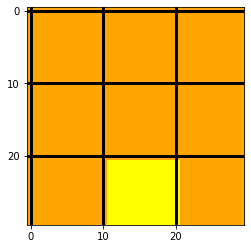

row:  11
rubric:  214
location: 570 600 390 420


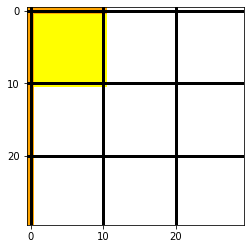

row:  11
rubric:  215
location: 570 600 420 450


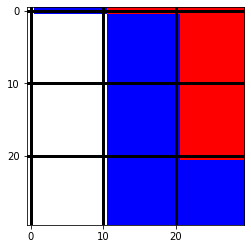

row:  11
rubric:  216
location: 570 600 450 480


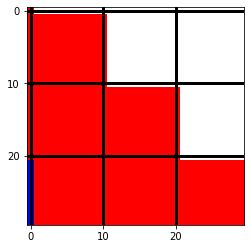

row:  11
rubric:  217
location: 570 600 480 510


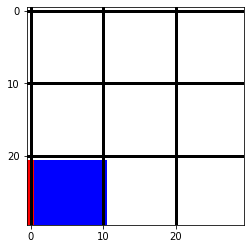

row:  11
rubric:  218
location: 570 600 510 540


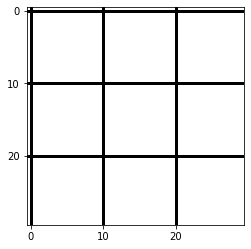

row:  11
rubric:  219
location: 570 600 540 570


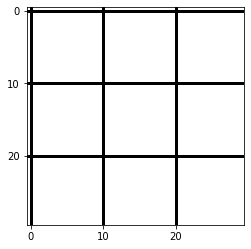

row:  11
rubric:  220
location: 570 600 570 600


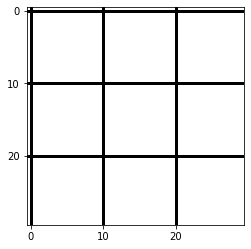

row:  12
rubric:  221
location: 540 570 1 30


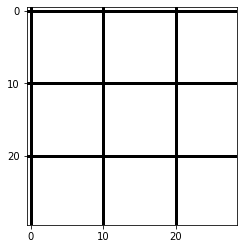

row:  12
rubric:  222
location: 540 570 30 60


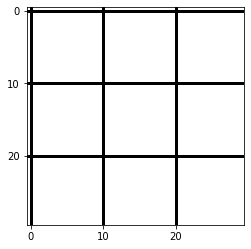

row:  12
rubric:  223
location: 540 570 60 90


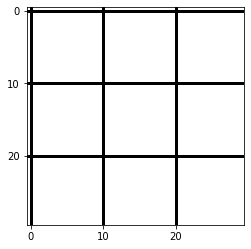

row:  12
rubric:  224
location: 540 570 90 120


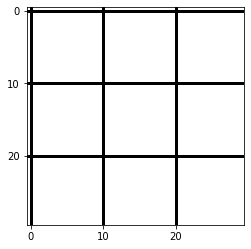

row:  12
rubric:  225
location: 540 570 120 150


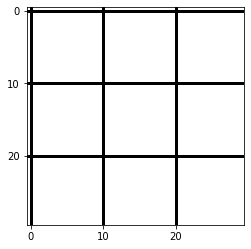

row:  12
rubric:  226
location: 540 570 150 180


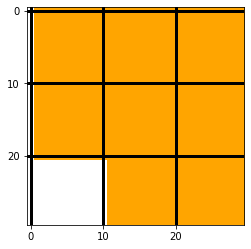

row:  12
rubric:  227
location: 540 570 180 210


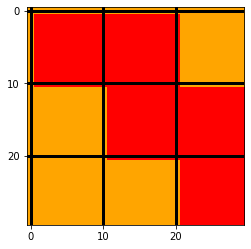

row:  12
rubric:  228
location: 540 570 210 240


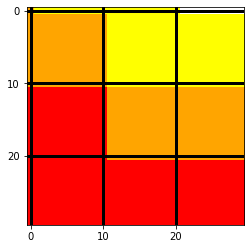

row:  12
rubric:  229
location: 540 570 240 270


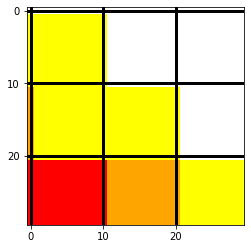

row:  12
rubric:  230
location: 540 570 270 300


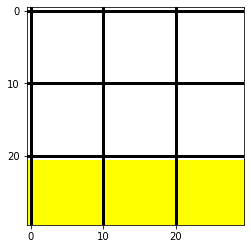

row:  12
rubric:  231
location: 540 570 300 330


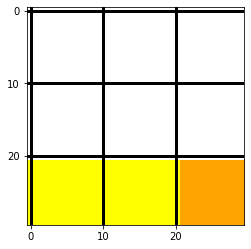

row:  12
rubric:  232
location: 540 570 330 360


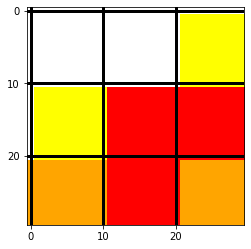

row:  12
rubric:  233
location: 540 570 360 390


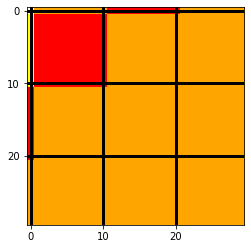

row:  12
rubric:  234
location: 540 570 390 420


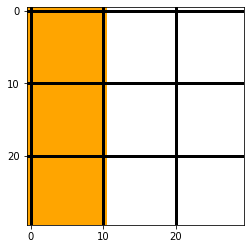

row:  12
rubric:  235
location: 540 570 420 450


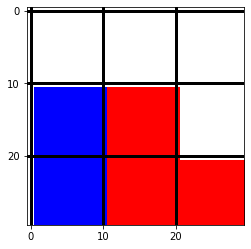

row:  12
rubric:  236
location: 540 570 450 480


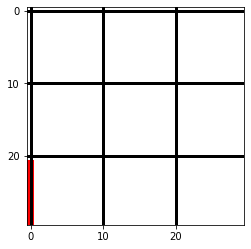

row:  12
rubric:  237
location: 540 570 480 510


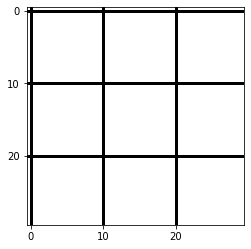

row:  12
rubric:  238
location: 540 570 510 540


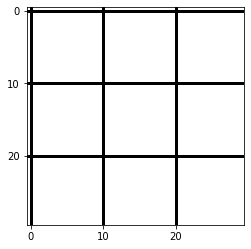

row:  12
rubric:  239
location: 540 570 540 570


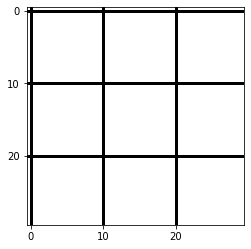

row:  12
rubric:  240
location: 540 570 570 600


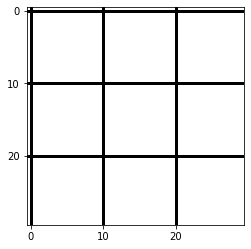

row:  13
rubric:  241
location: 510 540 1 30


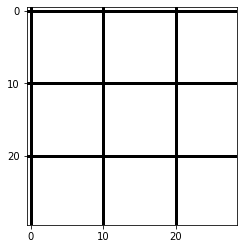

row:  13
rubric:  242
location: 510 540 30 60


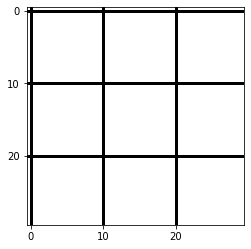

row:  13
rubric:  243
location: 510 540 60 90


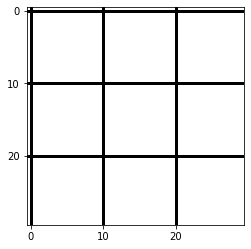

row:  13
rubric:  244
location: 510 540 90 120


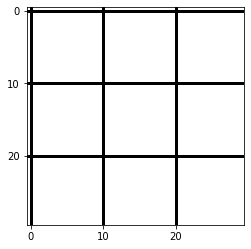

row:  13
rubric:  245
location: 510 540 120 150


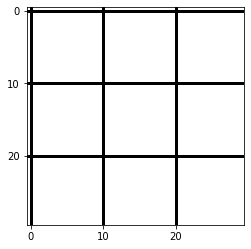

row:  13
rubric:  246
location: 510 540 150 180


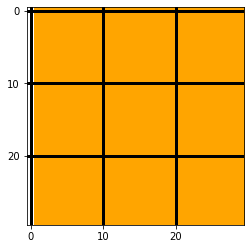

row:  13
rubric:  247
location: 510 540 180 210


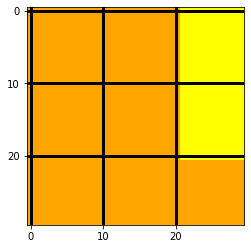

row:  13
rubric:  248
location: 510 540 210 240


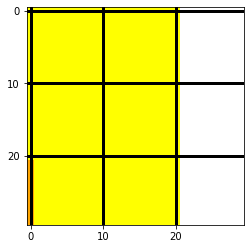

row:  13
rubric:  249
location: 510 540 240 270


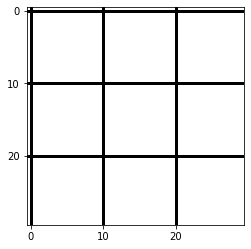

row:  13
rubric:  250
location: 510 540 270 300


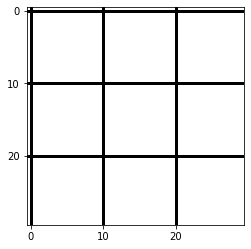

row:  13
rubric:  251
location: 510 540 300 330


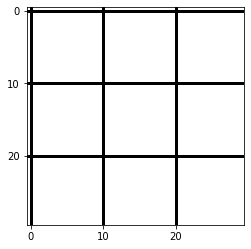

row:  13
rubric:  252
location: 510 540 330 360


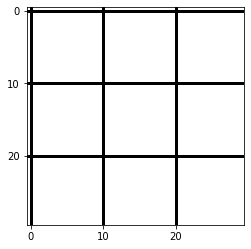

row:  13
rubric:  253
location: 510 540 360 390


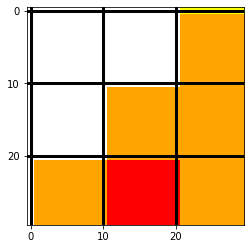

row:  13
rubric:  254
location: 510 540 390 420


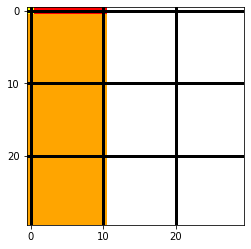

row:  13
rubric:  255
location: 510 540 420 450


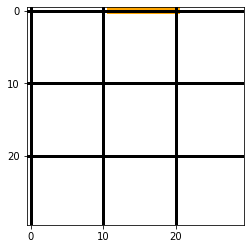

row:  13
rubric:  256
location: 510 540 450 480


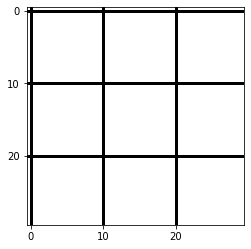

row:  13
rubric:  257
location: 510 540 480 510


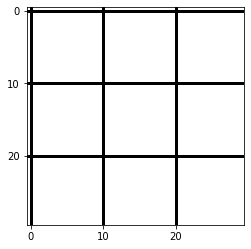

row:  13
rubric:  258
location: 510 540 510 540


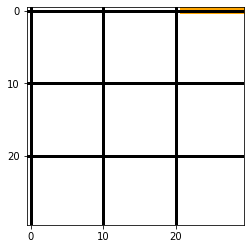

row:  13
rubric:  259
location: 510 540 540 570


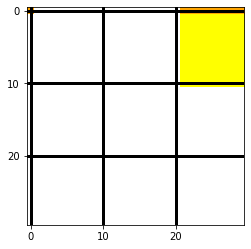

row:  13
rubric:  260
location: 510 540 570 600


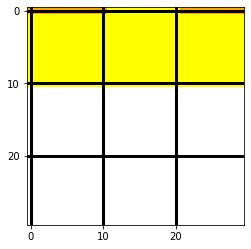

row:  14
rubric:  261
location: 480 510 1 30


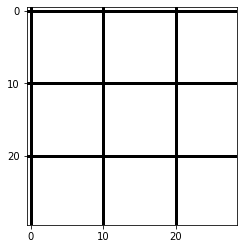

row:  14
rubric:  262
location: 480 510 30 60


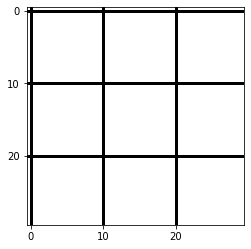

row:  14
rubric:  263
location: 480 510 60 90


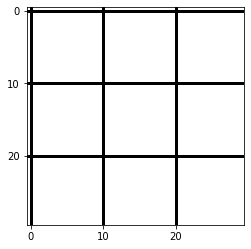

row:  14
rubric:  264
location: 480 510 90 120


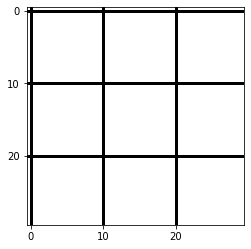

row:  14
rubric:  265
location: 480 510 120 150


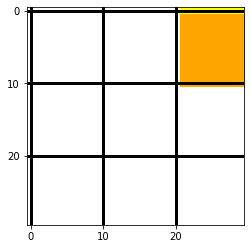

row:  14
rubric:  266
location: 480 510 150 180


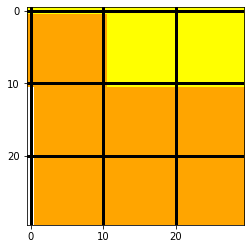

row:  14
rubric:  267
location: 480 510 180 210


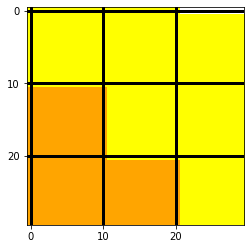

row:  14
rubric:  268
location: 480 510 210 240


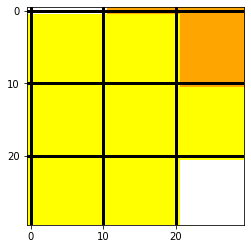

row:  14
rubric:  269
location: 480 510 240 270


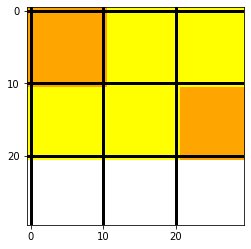

row:  14
rubric:  270
location: 480 510 270 300


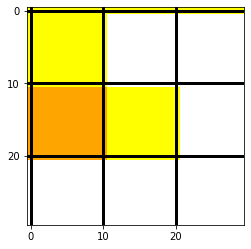

row:  14
rubric:  271
location: 480 510 300 330


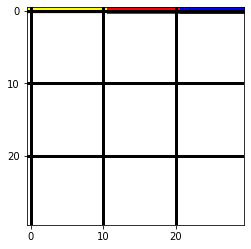

row:  14
rubric:  272
location: 480 510 330 360


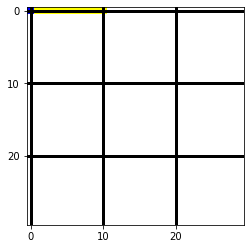

row:  14
rubric:  273
location: 480 510 360 390


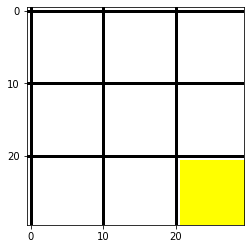

row:  14
rubric:  274
location: 480 510 390 420


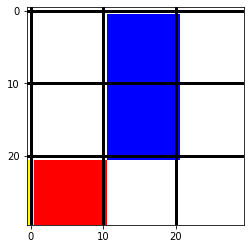

row:  14
rubric:  275
location: 480 510 420 450


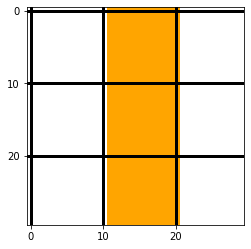

row:  14
rubric:  276
location: 480 510 450 480


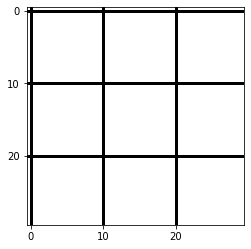

row:  14
rubric:  277
location: 480 510 480 510


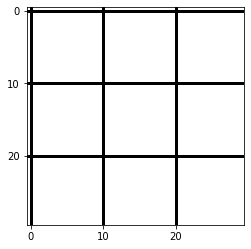

row:  14
rubric:  278
location: 480 510 510 540


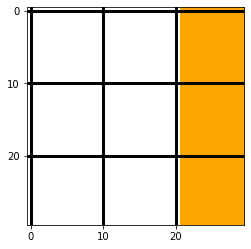

row:  14
rubric:  279
location: 480 510 540 570


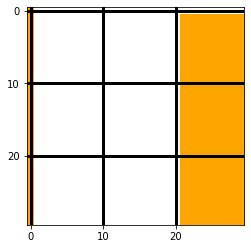

row:  14
rubric:  280
location: 480 510 570 600


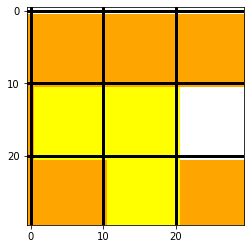

row:  15
rubric:  281
location: 450 480 1 30


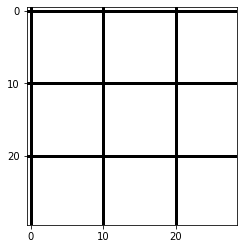

row:  15
rubric:  282
location: 450 480 30 60


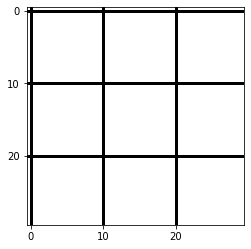

row:  15
rubric:  283
location: 450 480 60 90


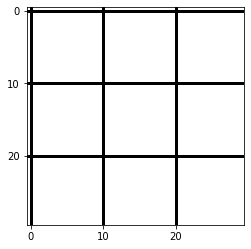

row:  15
rubric:  284
location: 450 480 90 120


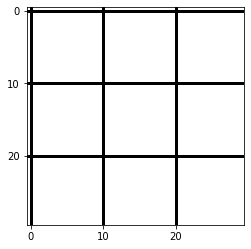

row:  15
rubric:  285
location: 450 480 120 150


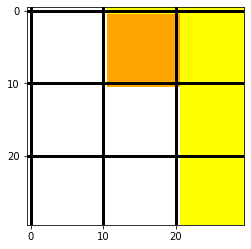

row:  15
rubric:  286
location: 450 480 150 180


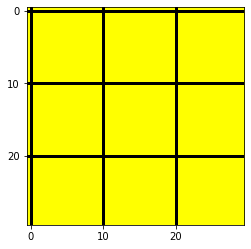

row:  15
rubric:  287
location: 450 480 180 210


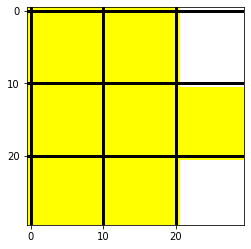

row:  15
rubric:  288
location: 450 480 210 240


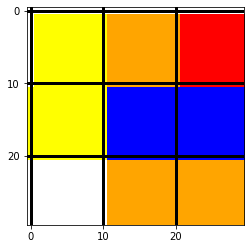

row:  15
rubric:  289
location: 450 480 240 270


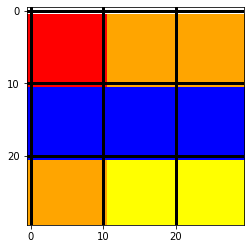

row:  15
rubric:  290
location: 450 480 270 300


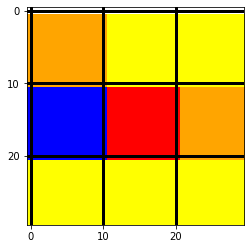

row:  15
rubric:  291
location: 450 480 300 330


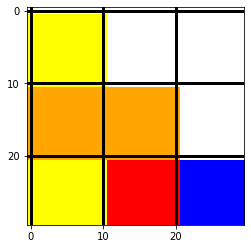

row:  15
rubric:  292
location: 450 480 330 360


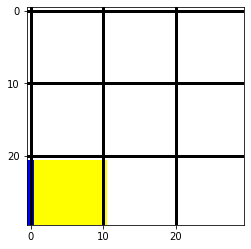

row:  15
rubric:  293
location: 450 480 360 390


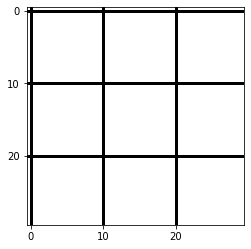

row:  15
rubric:  294
location: 450 480 390 420


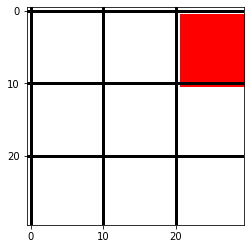

row:  15
rubric:  295
location: 450 480 420 450


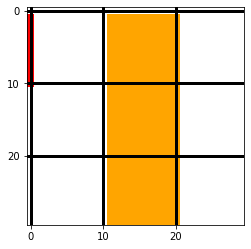

row:  15
rubric:  296
location: 450 480 450 480


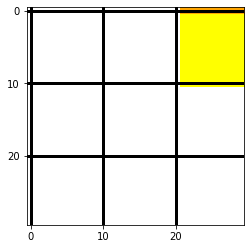

row:  15
rubric:  297
location: 450 480 480 510


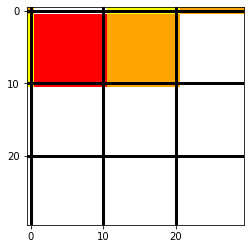

row:  15
rubric:  298
location: 450 480 510 540


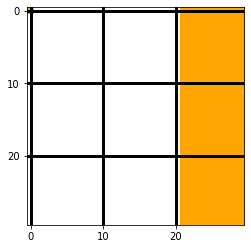

row:  15
rubric:  299
location: 450 480 540 570


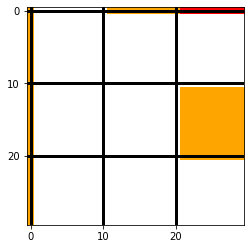

row:  15
rubric:  300
location: 450 480 570 600


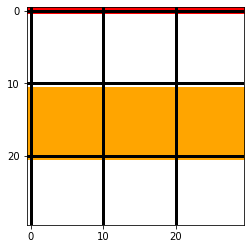

row:  16
rubric:  301
location: 420 450 1 30


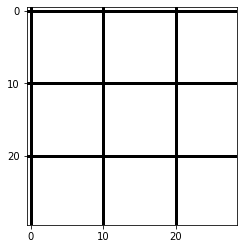

row:  16
rubric:  302
location: 420 450 30 60


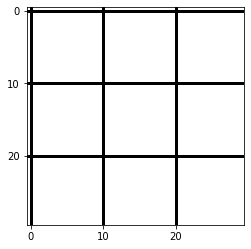

row:  16
rubric:  303
location: 420 450 60 90


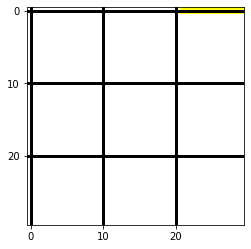

row:  16
rubric:  304
location: 420 450 90 120


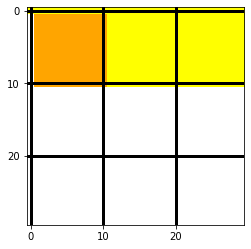

row:  16
rubric:  305
location: 420 450 120 150


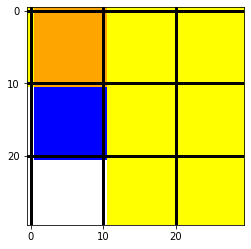

row:  16
rubric:  306
location: 420 450 150 180


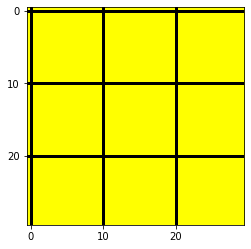

row:  16
rubric:  307
location: 420 450 180 210


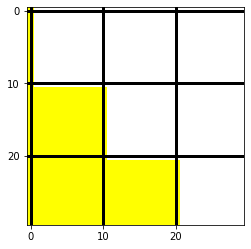

row:  16
rubric:  308
location: 420 450 210 240


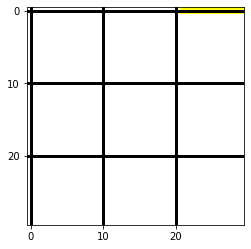

row:  16
rubric:  309
location: 420 450 240 270


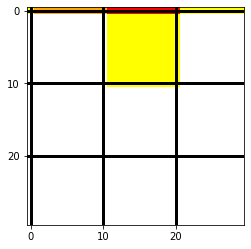

row:  16
rubric:  310
location: 420 450 270 300


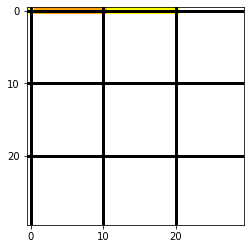

row:  16
rubric:  311
location: 420 450 300 330


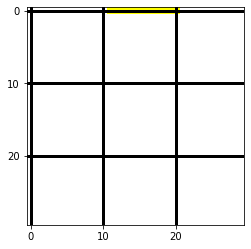

row:  16
rubric:  312
location: 420 450 330 360


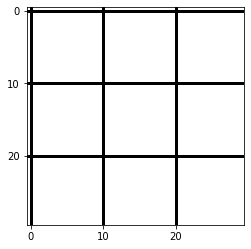

row:  16
rubric:  313
location: 420 450 360 390


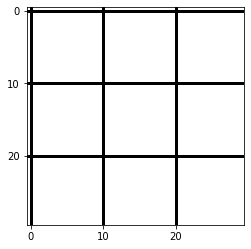

row:  16
rubric:  314
location: 420 450 390 420


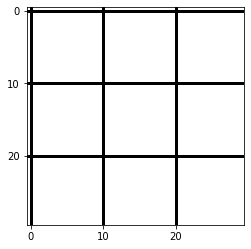

row:  16
rubric:  315
location: 420 450 420 450


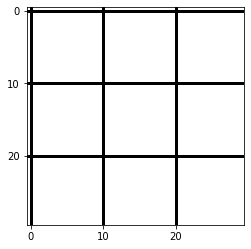

row:  16
rubric:  316
location: 420 450 450 480


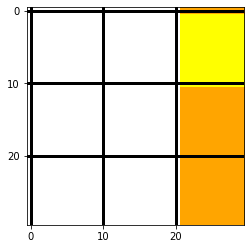

row:  16
rubric:  317
location: 420 450 480 510


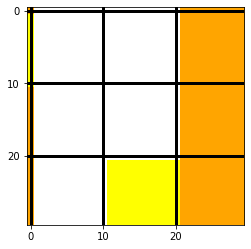

row:  16
rubric:  318
location: 420 450 510 540


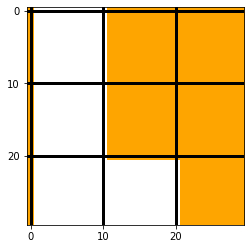

row:  16
rubric:  319
location: 420 450 540 570


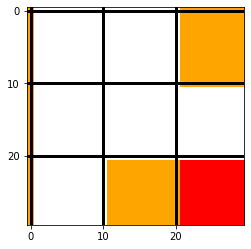

row:  16
rubric:  320
location: 420 450 570 600


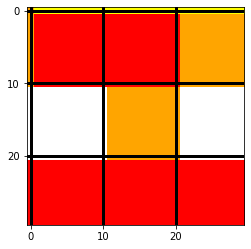

row:  17
rubric:  321
location: 390 420 1 30


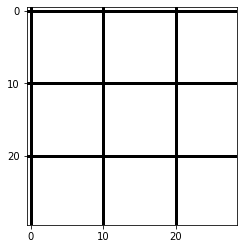

row:  17
rubric:  322
location: 390 420 30 60


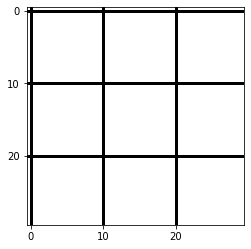

row:  17
rubric:  323
location: 390 420 60 90


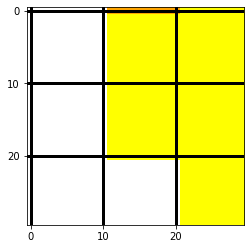

row:  17
rubric:  324
location: 390 420 90 120


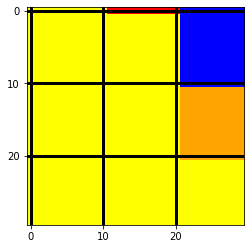

row:  17
rubric:  325
location: 390 420 120 150


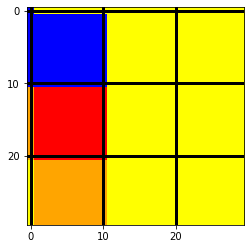

row:  17
rubric:  326
location: 390 420 150 180


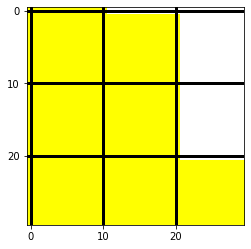

row:  17
rubric:  327
location: 390 420 180 210


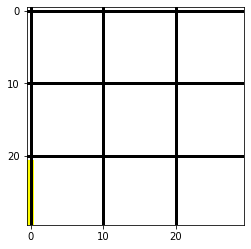

row:  17
rubric:  328
location: 390 420 210 240


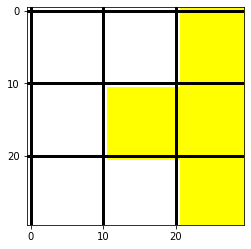

row:  17
rubric:  329
location: 390 420 240 270


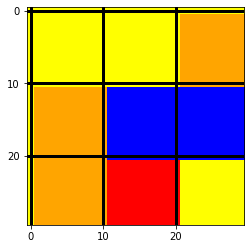

row:  17
rubric:  330
location: 390 420 270 300


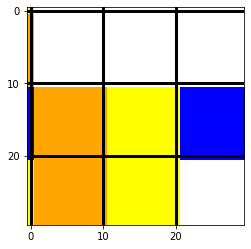

row:  17
rubric:  331
location: 390 420 300 330


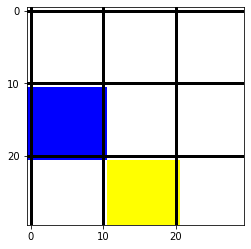

row:  17
rubric:  332
location: 390 420 330 360


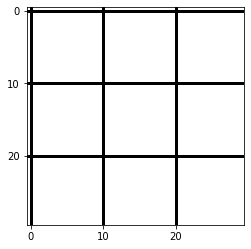

row:  17
rubric:  333
location: 390 420 360 390


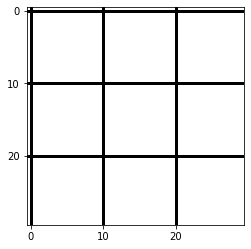

row:  17
rubric:  334
location: 390 420 390 420


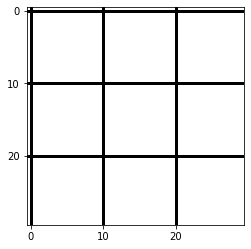

row:  17
rubric:  335
location: 390 420 420 450


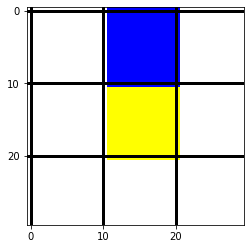

row:  17
rubric:  336
location: 390 420 450 480


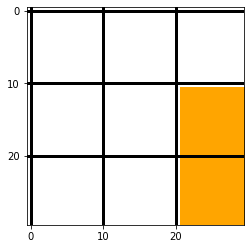

row:  17
rubric:  337
location: 390 420 480 510


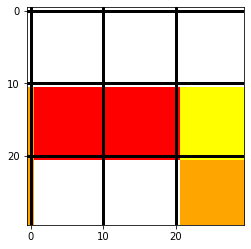

row:  17
rubric:  338
location: 390 420 510 540


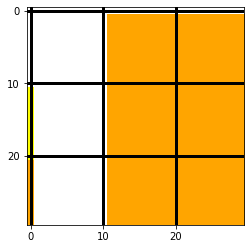

row:  17
rubric:  339
location: 390 420 540 570


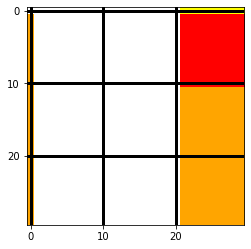

row:  17
rubric:  340
location: 390 420 570 600


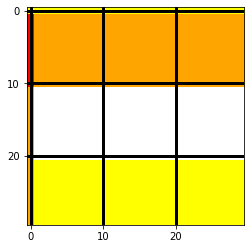

row:  18
rubric:  341
location: 360 390 1 30


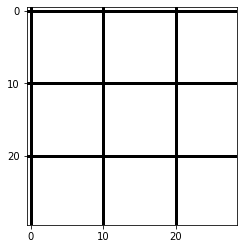

row:  18
rubric:  342
location: 360 390 30 60


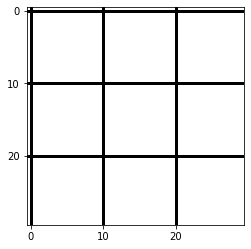

row:  18
rubric:  343
location: 360 390 60 90


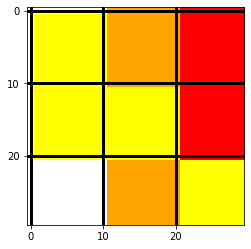

row:  18
rubric:  344
location: 360 390 90 120


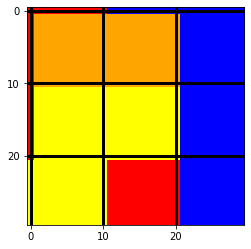

row:  18
rubric:  345
location: 360 390 120 150


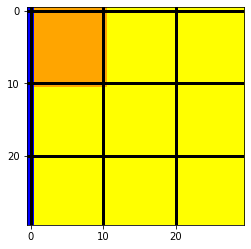

row:  18
rubric:  346
location: 360 390 150 180


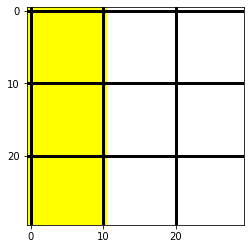

row:  18
rubric:  347
location: 360 390 180 210


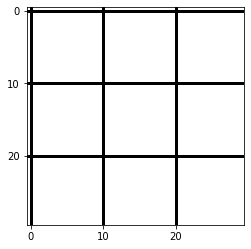

row:  18
rubric:  348
location: 360 390 210 240


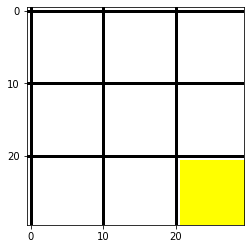

row:  18
rubric:  349
location: 360 390 240 270


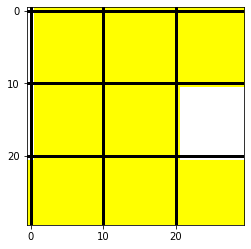

row:  18
rubric:  350
location: 360 390 270 300


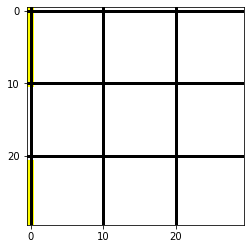

row:  18
rubric:  351
location: 360 390 300 330


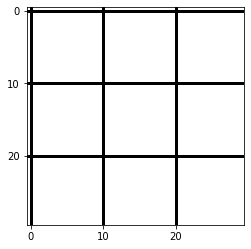

row:  18
rubric:  352
location: 360 390 330 360


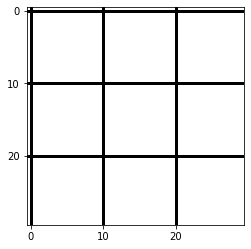

row:  18
rubric:  353
location: 360 390 360 390


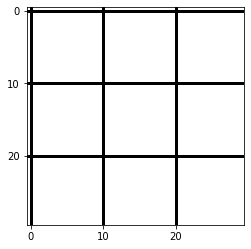

row:  18
rubric:  354
location: 360 390 390 420


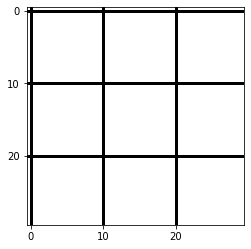

row:  18
rubric:  355
location: 360 390 420 450


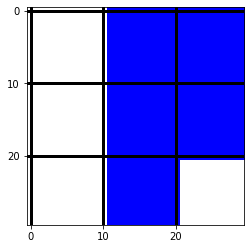

row:  18
rubric:  356
location: 360 390 450 480


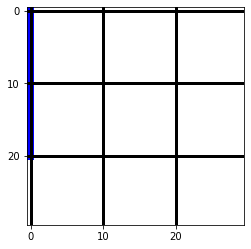

row:  18
rubric:  357
location: 360 390 480 510


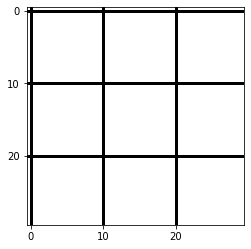

row:  18
rubric:  358
location: 360 390 510 540


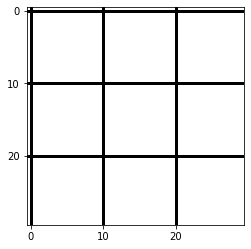

row:  18
rubric:  359
location: 360 390 540 570


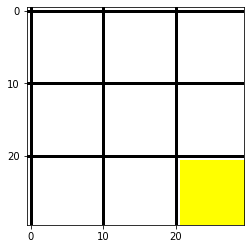

row:  18
rubric:  360
location: 360 390 570 600


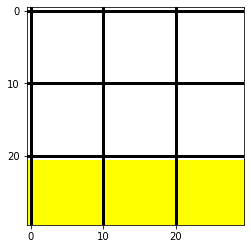

row:  19
rubric:  361
location: 330 360 1 30


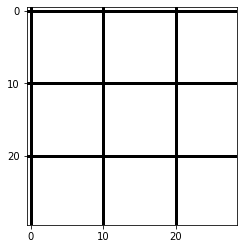

row:  19
rubric:  362
location: 330 360 30 60


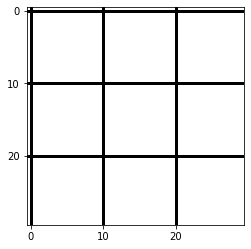

row:  19
rubric:  363
location: 330 360 60 90


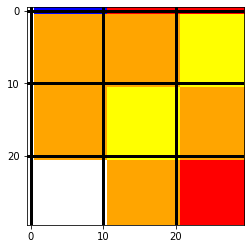

row:  19
rubric:  364
location: 330 360 90 120


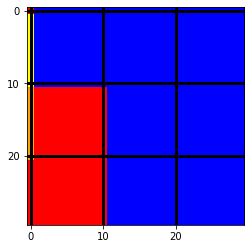

row:  19
rubric:  365
location: 330 360 120 150


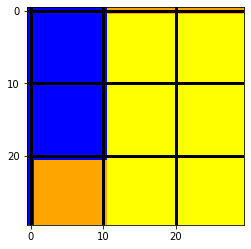

row:  19
rubric:  366
location: 330 360 150 180


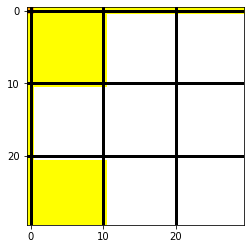

row:  19
rubric:  367
location: 330 360 180 210


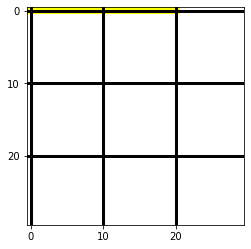

row:  19
rubric:  368
location: 330 360 210 240


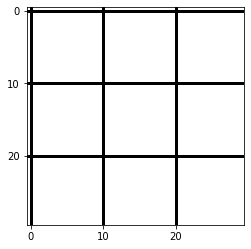

row:  19
rubric:  369
location: 330 360 240 270


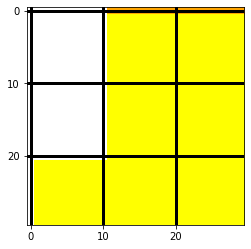

row:  19
rubric:  370
location: 330 360 270 300


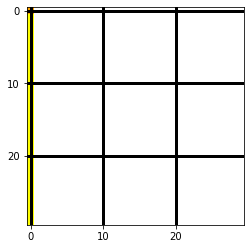

row:  19
rubric:  371
location: 330 360 300 330


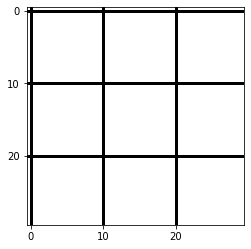

row:  19
rubric:  372
location: 330 360 330 360


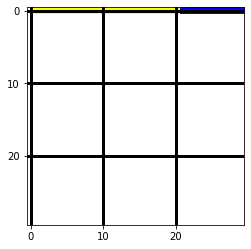

row:  19
rubric:  373
location: 330 360 360 390


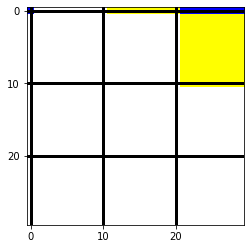

row:  19
rubric:  374
location: 330 360 390 420


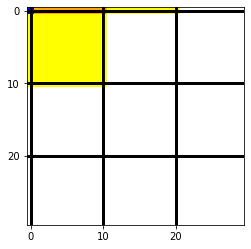

row:  19
rubric:  375
location: 330 360 420 450


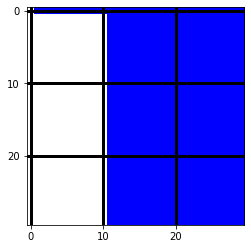

row:  19
rubric:  376
location: 330 360 450 480


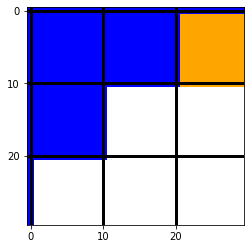

row:  19
rubric:  377
location: 330 360 480 510


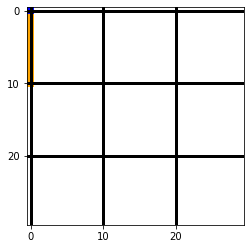

row:  19
rubric:  378
location: 330 360 510 540


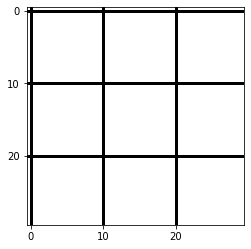

row:  19
rubric:  379
location: 330 360 540 570


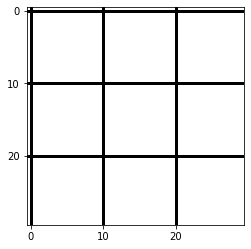

row:  19
rubric:  380
location: 330 360 570 600


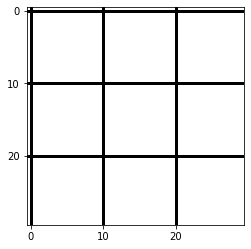

row:  20
rubric:  381
location: 300 330 1 30


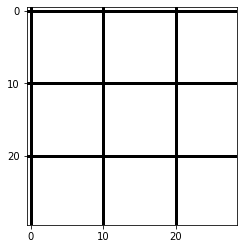

row:  20
rubric:  382
location: 300 330 30 60


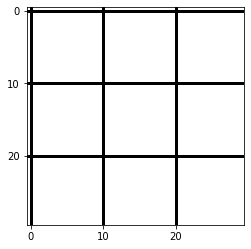

row:  20
rubric:  383
location: 300 330 60 90


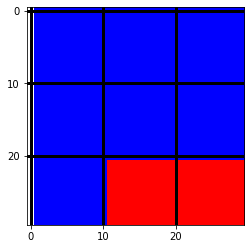

row:  20
rubric:  384
location: 300 330 90 120


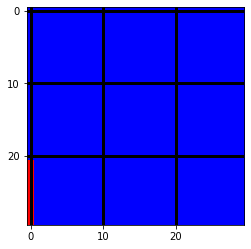

row:  20
rubric:  385
location: 300 330 120 150


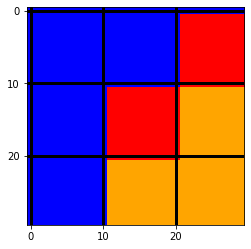

row:  20
rubric:  386
location: 300 330 150 180


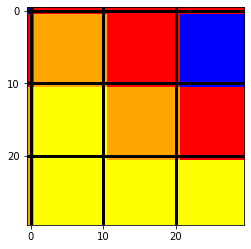

row:  20
rubric:  387
location: 300 330 180 210


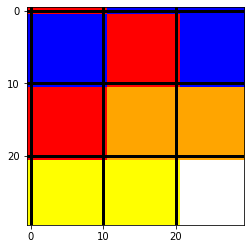

row:  20
rubric:  388
location: 300 330 210 240


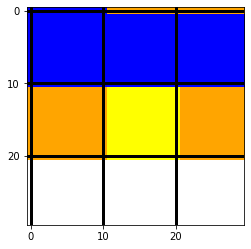

row:  20
rubric:  389
location: 300 330 240 270


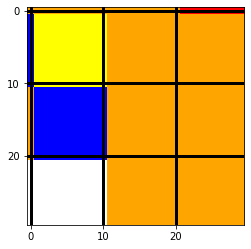

row:  20
rubric:  390
location: 300 330 270 300


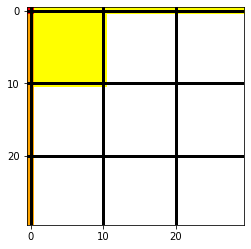

row:  20
rubric:  391
location: 300 330 300 330


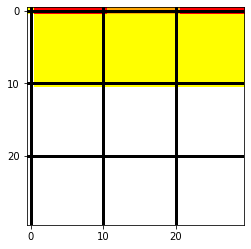

row:  20
rubric:  392
location: 300 330 330 360


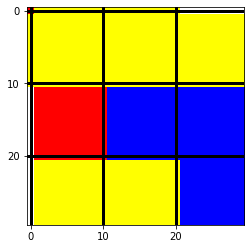

row:  20
rubric:  393
location: 300 330 360 390


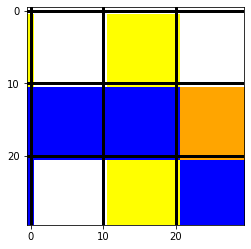

row:  20
rubric:  394
location: 300 330 390 420


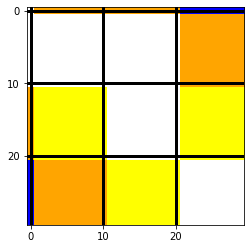

row:  20
rubric:  395
location: 300 330 420 450


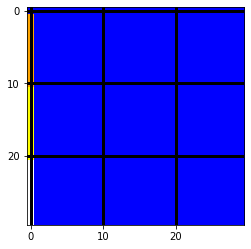

row:  20
rubric:  396
location: 300 330 450 480


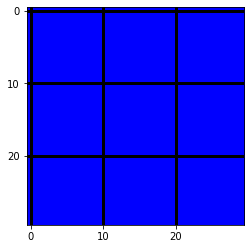

row:  20
rubric:  397
location: 300 330 480 510


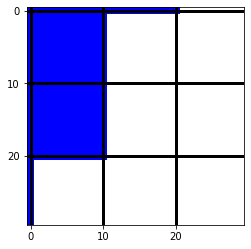

row:  20
rubric:  398
location: 300 330 510 540


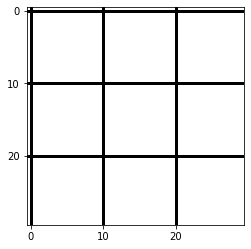

row:  20
rubric:  399
location: 300 330 540 570


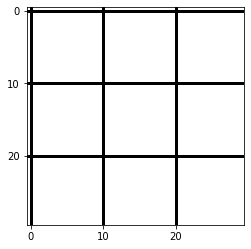

row:  20
rubric:  400
location: 300 330 570 600


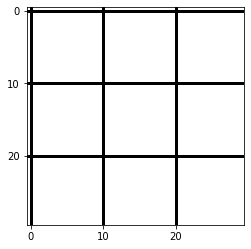

row:  21
rubric:  401
location: 270 300 1 30


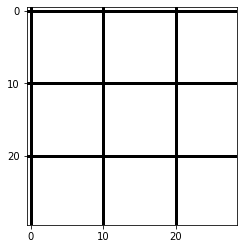

row:  21
rubric:  402
location: 270 300 30 60


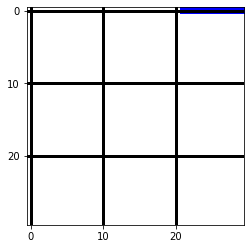

row:  21
rubric:  403
location: 270 300 60 90


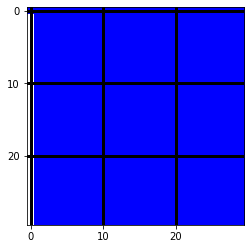

row:  21
rubric:  404
location: 270 300 90 120


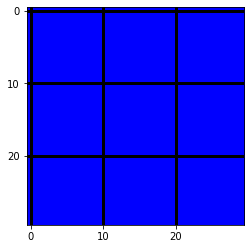

row:  21
rubric:  405
location: 270 300 120 150


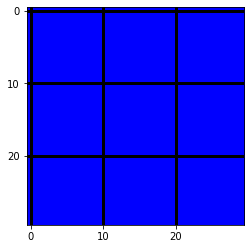

row:  21
rubric:  406
location: 270 300 150 180


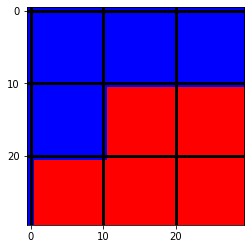

row:  21
rubric:  407
location: 270 300 180 210


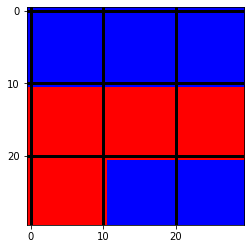

row:  21
rubric:  408
location: 270 300 210 240


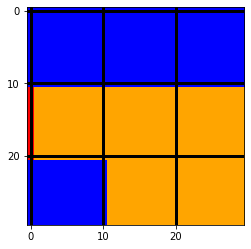

row:  21
rubric:  409
location: 270 300 240 270


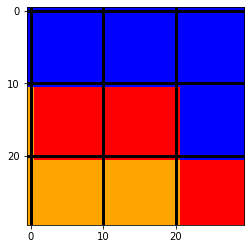

row:  21
rubric:  410
location: 270 300 270 300


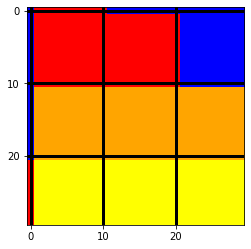

row:  21
rubric:  411
location: 270 300 300 330


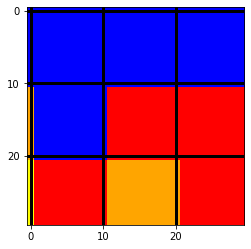

row:  21
rubric:  412
location: 270 300 330 360


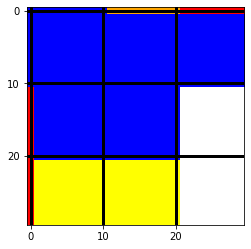

row:  21
rubric:  413
location: 270 300 360 390


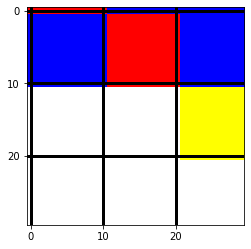

row:  21
rubric:  414
location: 270 300 390 420


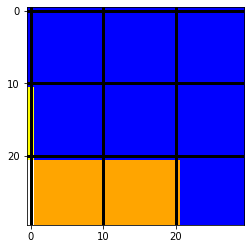

row:  21
rubric:  415
location: 270 300 420 450


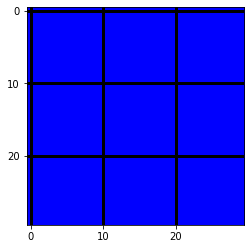

row:  21
rubric:  416
location: 270 300 450 480


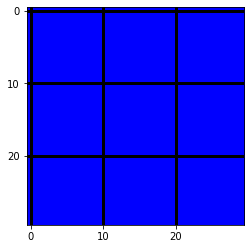

row:  21
rubric:  417
location: 270 300 480 510


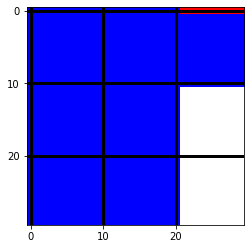

row:  21
rubric:  418
location: 270 300 510 540


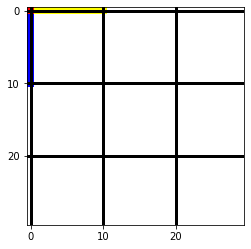

row:  21
rubric:  419
location: 270 300 540 570


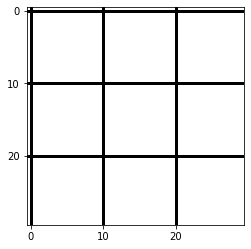

row:  21
rubric:  420
location: 270 300 570 600


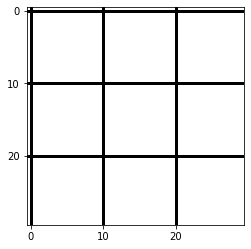

row:  22
rubric:  421
location: 240 270 1 30


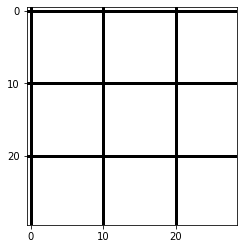

row:  22
rubric:  422
location: 240 270 30 60


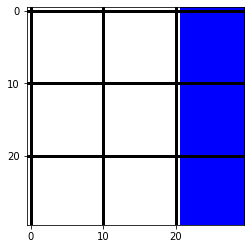

row:  22
rubric:  423
location: 240 270 60 90


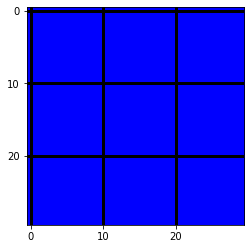

row:  22
rubric:  424
location: 240 270 90 120


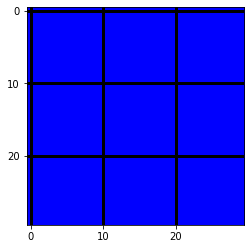

row:  22
rubric:  425
location: 240 270 120 150


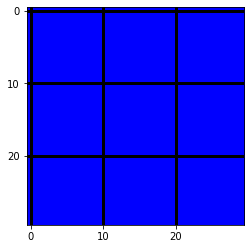

row:  22
rubric:  426
location: 240 270 150 180


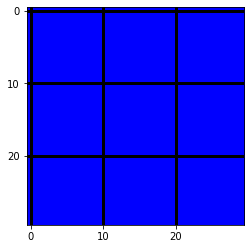

row:  22
rubric:  427
location: 240 270 180 210


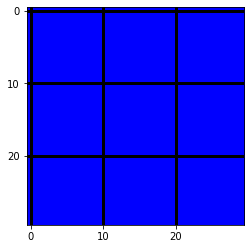

row:  22
rubric:  428
location: 240 270 210 240


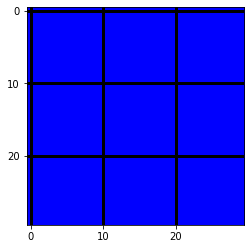

row:  22
rubric:  429
location: 240 270 240 270


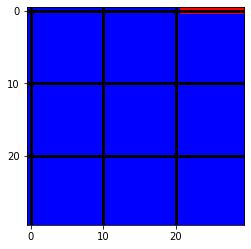

row:  22
rubric:  430
location: 240 270 270 300


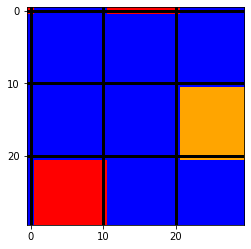

row:  22
rubric:  431
location: 240 270 300 330


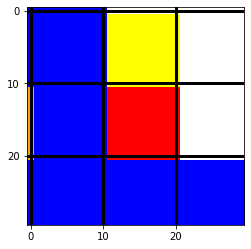

row:  22
rubric:  432
location: 240 270 330 360


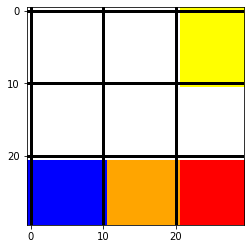

row:  22
rubric:  433
location: 240 270 360 390


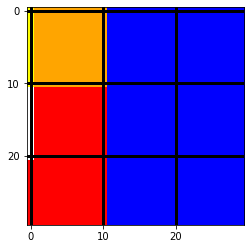

row:  22
rubric:  434
location: 240 270 390 420


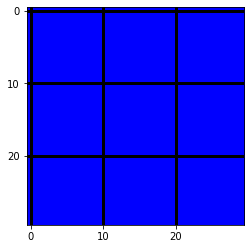

row:  22
rubric:  435
location: 240 270 420 450


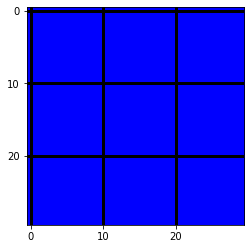

row:  22
rubric:  436
location: 240 270 450 480


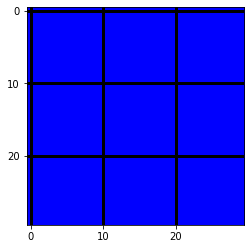

row:  22
rubric:  437
location: 240 270 480 510


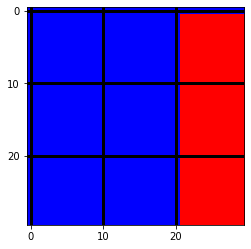

row:  22
rubric:  438
location: 240 270 510 540


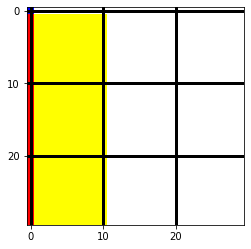

row:  22
rubric:  439
location: 240 270 540 570


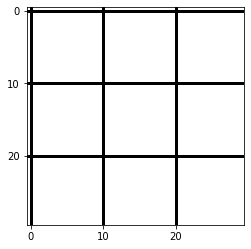

row:  22
rubric:  440
location: 240 270 570 600


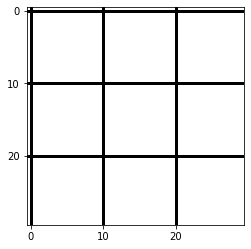

row:  23
rubric:  441
location: 210 240 1 30


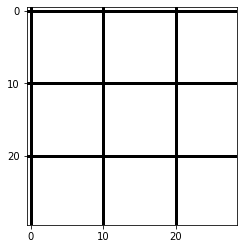

row:  23
rubric:  442
location: 210 240 30 60


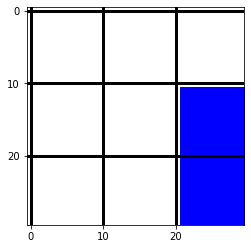

row:  23
rubric:  443
location: 210 240 60 90


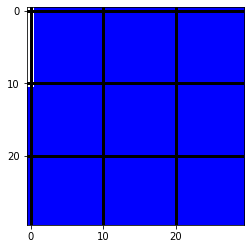

row:  23
rubric:  444
location: 210 240 90 120


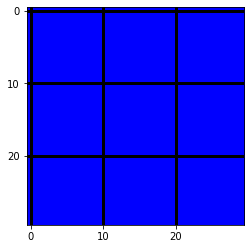

row:  23
rubric:  445
location: 210 240 120 150


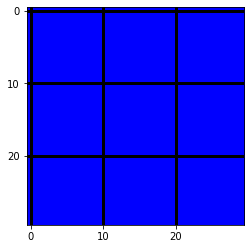

row:  23
rubric:  446
location: 210 240 150 180


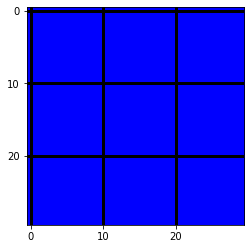

row:  23
rubric:  447
location: 210 240 180 210


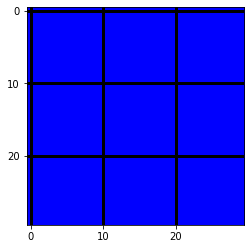

row:  23
rubric:  448
location: 210 240 210 240


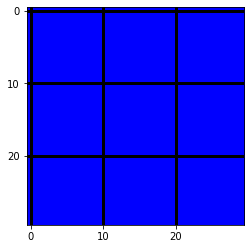

row:  23
rubric:  449
location: 210 240 240 270


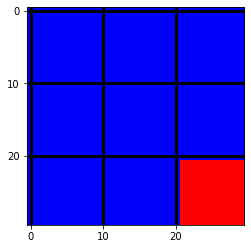

row:  23
rubric:  450
location: 210 240 270 300


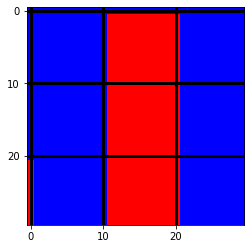

row:  23
rubric:  451
location: 210 240 300 330


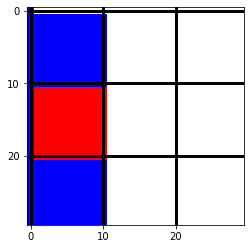

row:  23
rubric:  452
location: 210 240 330 360


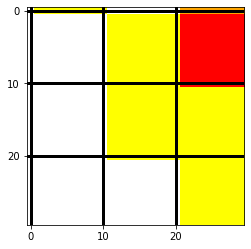

row:  23
rubric:  453
location: 210 240 360 390


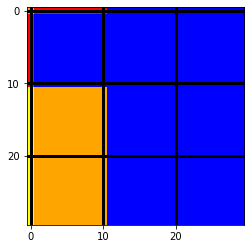

row:  23
rubric:  454
location: 210 240 390 420


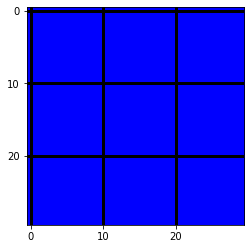

row:  23
rubric:  455
location: 210 240 420 450


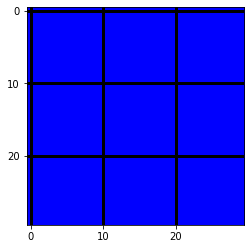

row:  23
rubric:  456
location: 210 240 450 480


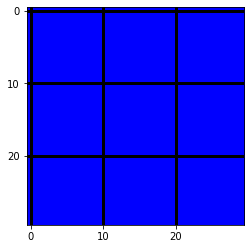

row:  23
rubric:  457
location: 210 240 480 510


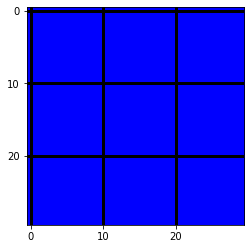

row:  23
rubric:  458
location: 210 240 510 540


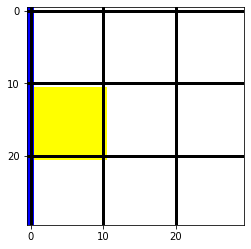

row:  23
rubric:  459
location: 210 240 540 570


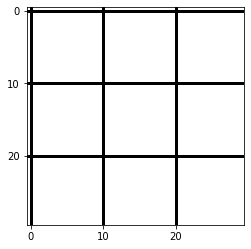

row:  23
rubric:  460
location: 210 240 570 600


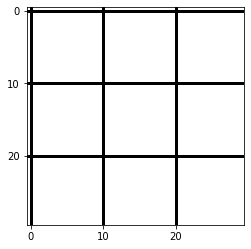

row:  24
rubric:  461
location: 180 210 1 30


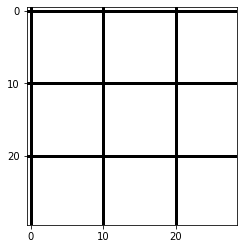

row:  24
rubric:  462
location: 180 210 30 60


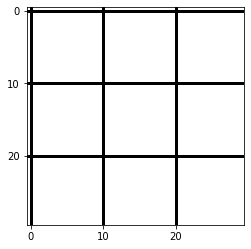

row:  24
rubric:  463
location: 180 210 60 90


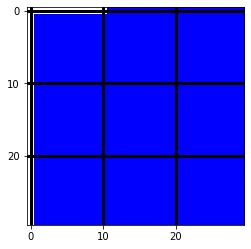

row:  24
rubric:  464
location: 180 210 90 120


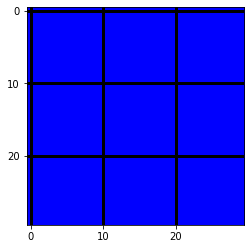

row:  24
rubric:  465
location: 180 210 120 150


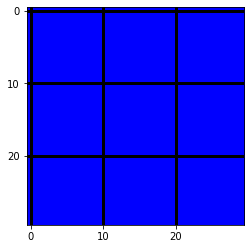

row:  24
rubric:  466
location: 180 210 150 180


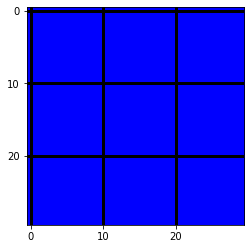

row:  24
rubric:  467
location: 180 210 180 210


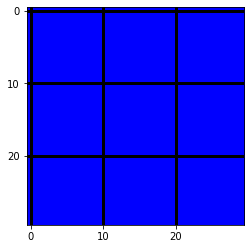

row:  24
rubric:  468
location: 180 210 210 240


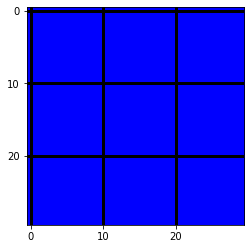

row:  24
rubric:  469
location: 180 210 240 270


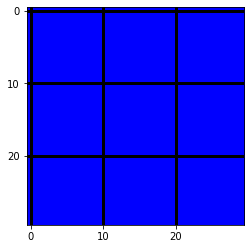

row:  24
rubric:  470
location: 180 210 270 300


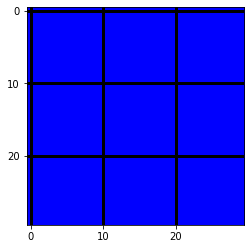

row:  24
rubric:  471
location: 180 210 300 330


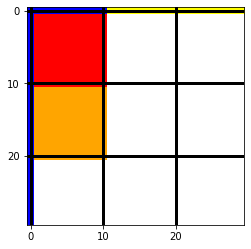

row:  24
rubric:  472
location: 180 210 330 360


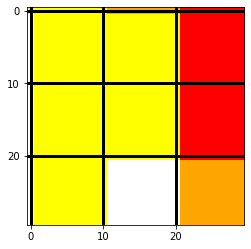

row:  24
rubric:  473
location: 180 210 360 390


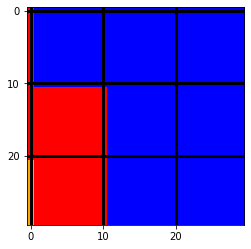

row:  24
rubric:  474
location: 180 210 390 420


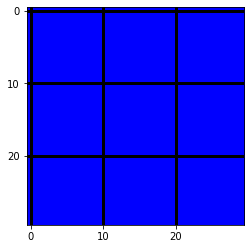

row:  24
rubric:  475
location: 180 210 420 450


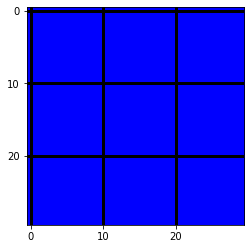

row:  24
rubric:  476
location: 180 210 450 480


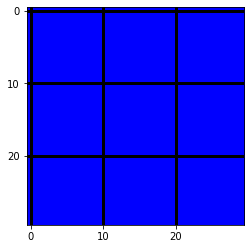

row:  24
rubric:  477
location: 180 210 480 510


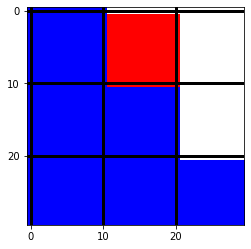

row:  24
rubric:  478
location: 180 210 510 540


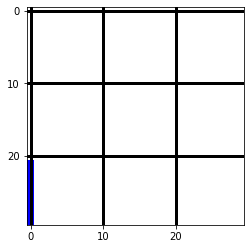

row:  24
rubric:  479
location: 180 210 540 570


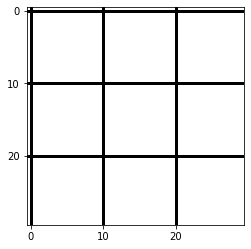

row:  24
rubric:  480
location: 180 210 570 600


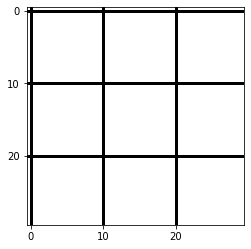

row:  25
rubric:  481
location: 150 180 1 30


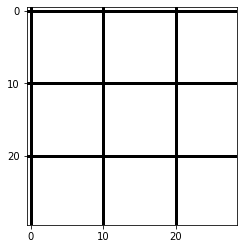

row:  25
rubric:  482
location: 150 180 30 60


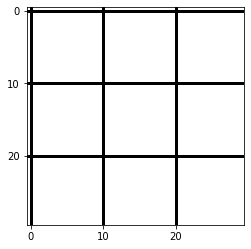

row:  25
rubric:  483
location: 150 180 60 90


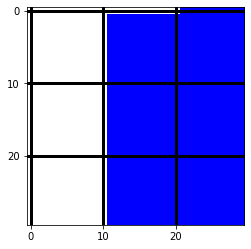

row:  25
rubric:  484
location: 150 180 90 120


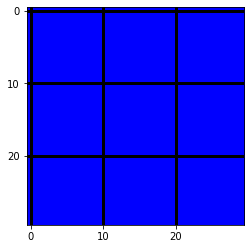

row:  25
rubric:  485
location: 150 180 120 150


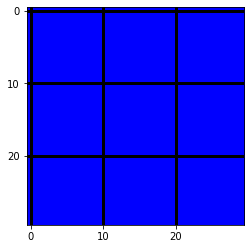

row:  25
rubric:  486
location: 150 180 150 180


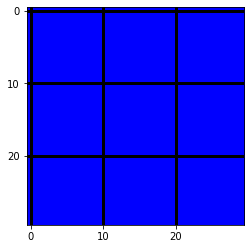

row:  25
rubric:  487
location: 150 180 180 210


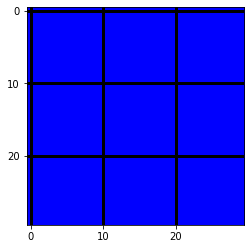

row:  25
rubric:  488
location: 150 180 210 240


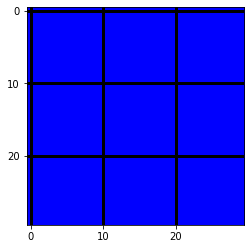

row:  25
rubric:  489
location: 150 180 240 270


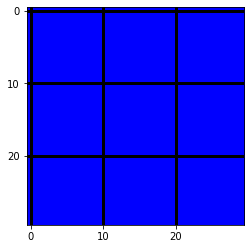

row:  25
rubric:  490
location: 150 180 270 300


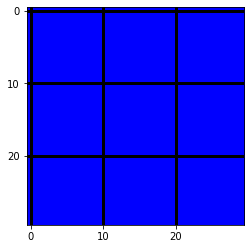

row:  25
rubric:  491
location: 150 180 300 330


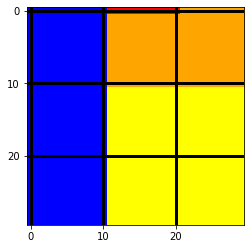

row:  25
rubric:  492
location: 150 180 330 360


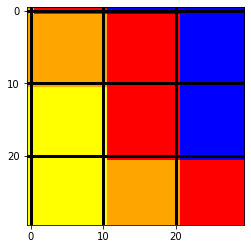

row:  25
rubric:  493
location: 150 180 360 390


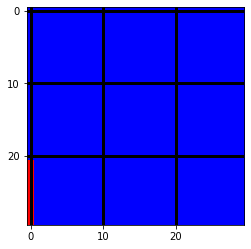

row:  25
rubric:  494
location: 150 180 390 420


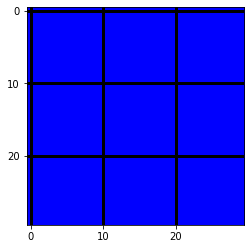

row:  25
rubric:  495
location: 150 180 420 450


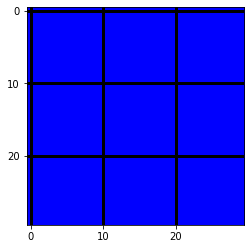

row:  25
rubric:  496
location: 150 180 450 480


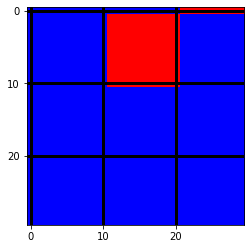

row:  25
rubric:  497
location: 150 180 480 510


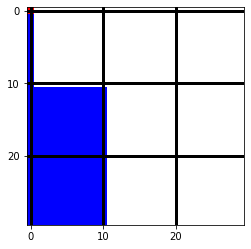

row:  25
rubric:  498
location: 150 180 510 540


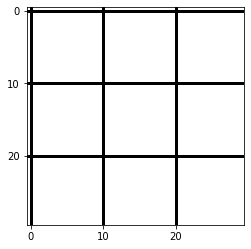

row:  25
rubric:  499
location: 150 180 540 570


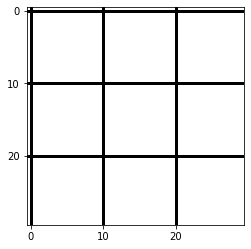

row:  25
rubric:  500
location: 150 180 570 600


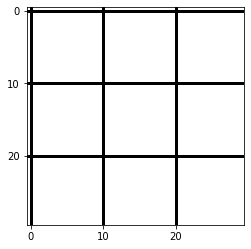

row:  26
rubric:  501
location: 120 150 1 30


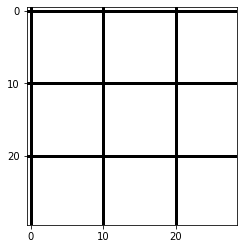

row:  26
rubric:  502
location: 120 150 30 60


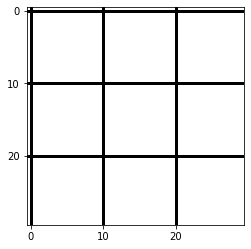

row:  26
rubric:  503
location: 120 150 60 90


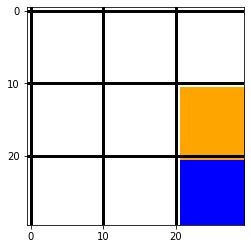

row:  26
rubric:  504
location: 120 150 90 120


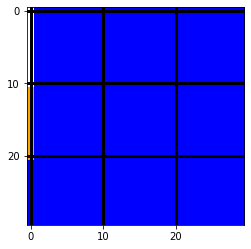

row:  26
rubric:  505
location: 120 150 120 150


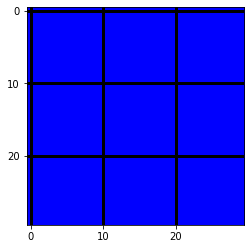

row:  26
rubric:  506
location: 120 150 150 180


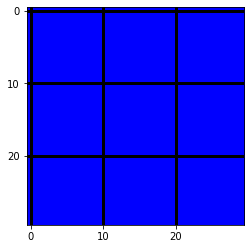

row:  26
rubric:  507
location: 120 150 180 210


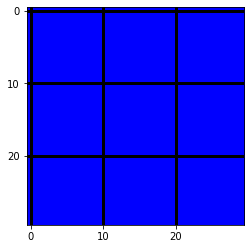

row:  26
rubric:  508
location: 120 150 210 240


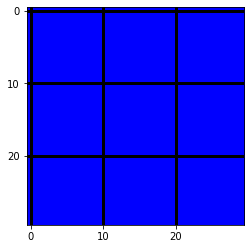

row:  26
rubric:  509
location: 120 150 240 270


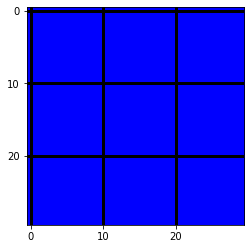

row:  26
rubric:  510
location: 120 150 270 300


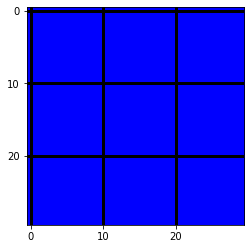

row:  26
rubric:  511
location: 120 150 300 330


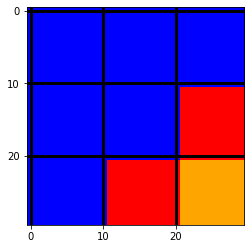

row:  26
rubric:  512
location: 120 150 330 360


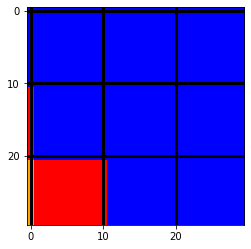

row:  26
rubric:  513
location: 120 150 360 390


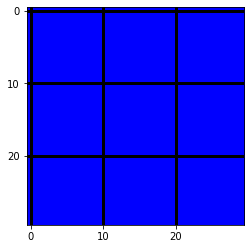

row:  26
rubric:  514
location: 120 150 390 420


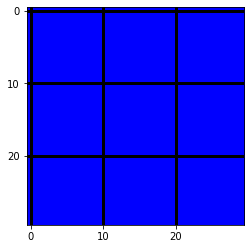

row:  26
rubric:  515
location: 120 150 420 450


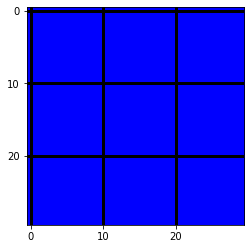

row:  26
rubric:  516
location: 120 150 450 480


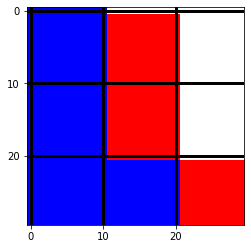

row:  26
rubric:  517
location: 120 150 480 510


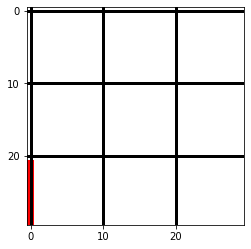

row:  26
rubric:  518
location: 120 150 510 540


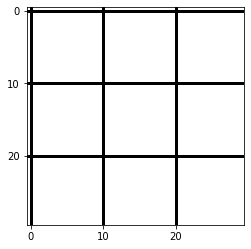

row:  26
rubric:  519
location: 120 150 540 570


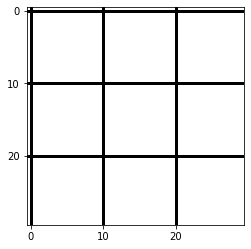

row:  26
rubric:  520
location: 120 150 570 600


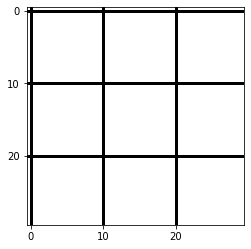

row:  27
rubric:  521
location: 90 120 1 30


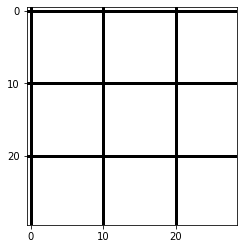

row:  27
rubric:  522
location: 90 120 30 60


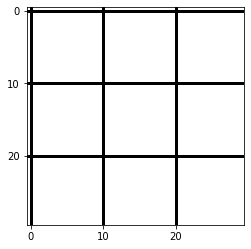

row:  27
rubric:  523
location: 90 120 60 90


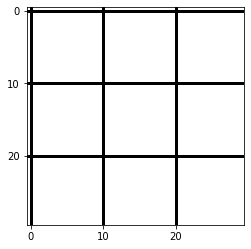

row:  27
rubric:  524
location: 90 120 90 120


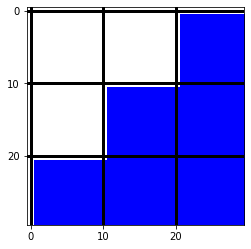

row:  27
rubric:  525
location: 90 120 120 150


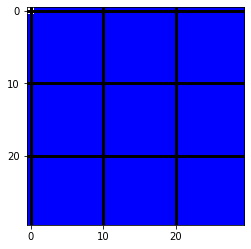

row:  27
rubric:  526
location: 90 120 150 180


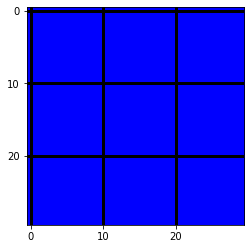

row:  27
rubric:  527
location: 90 120 180 210


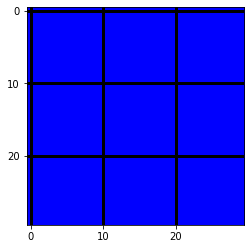

row:  27
rubric:  528
location: 90 120 210 240


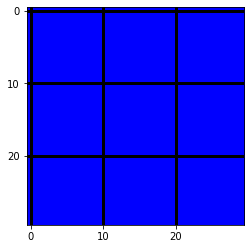

row:  27
rubric:  529
location: 90 120 240 270


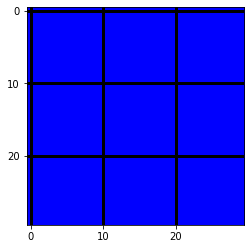

row:  27
rubric:  530
location: 90 120 270 300


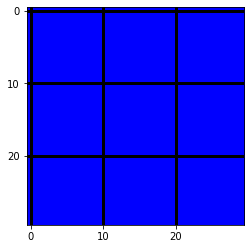

row:  27
rubric:  531
location: 90 120 300 330


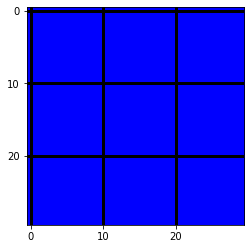

row:  27
rubric:  532
location: 90 120 330 360


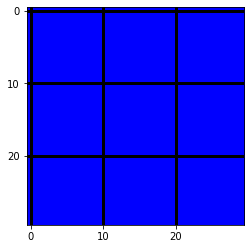

row:  27
rubric:  533
location: 90 120 360 390


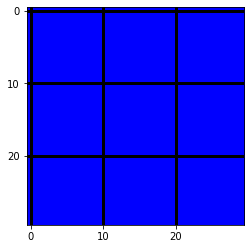

row:  27
rubric:  534
location: 90 120 390 420


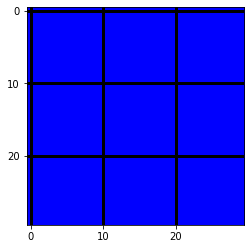

row:  27
rubric:  535
location: 90 120 420 450


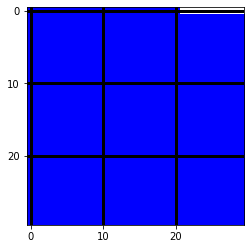

row:  27
rubric:  536
location: 90 120 450 480


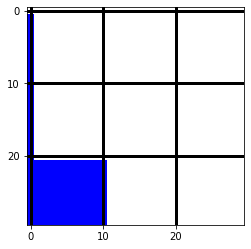

row:  27
rubric:  537
location: 90 120 480 510


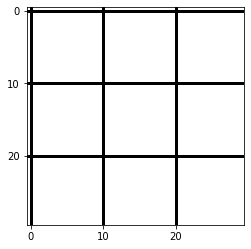

row:  27
rubric:  538
location: 90 120 510 540


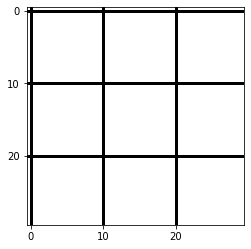

row:  27
rubric:  539
location: 90 120 540 570


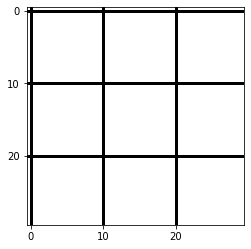

row:  27
rubric:  540
location: 90 120 570 600


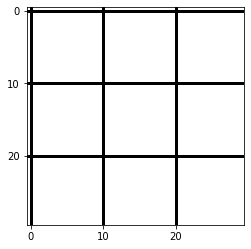

row:  28
rubric:  541
location: 60 90 1 30


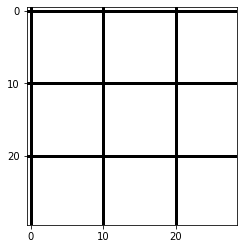

row:  28
rubric:  542
location: 60 90 30 60


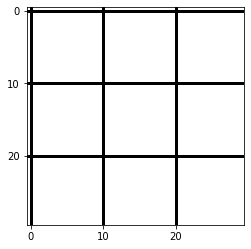

row:  28
rubric:  543
location: 60 90 60 90


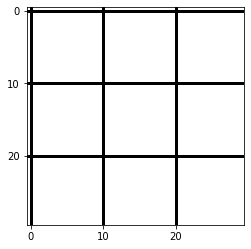

row:  28
rubric:  544
location: 60 90 90 120


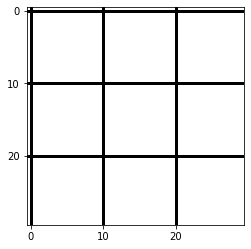

row:  28
rubric:  545
location: 60 90 120 150


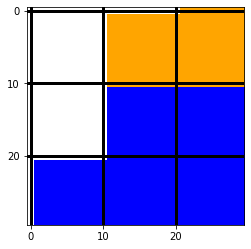

row:  28
rubric:  546
location: 60 90 150 180


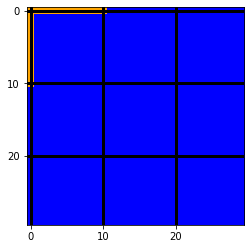

row:  28
rubric:  547
location: 60 90 180 210


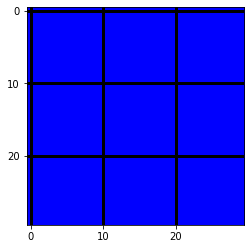

row:  28
rubric:  548
location: 60 90 210 240


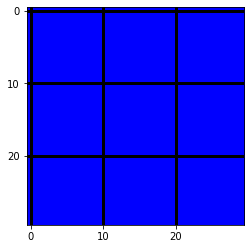

row:  28
rubric:  549
location: 60 90 240 270


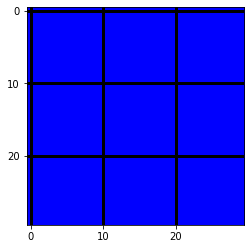

row:  28
rubric:  550
location: 60 90 270 300


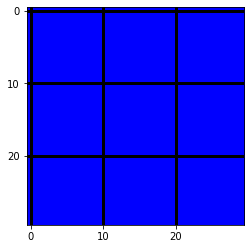

row:  28
rubric:  551
location: 60 90 300 330


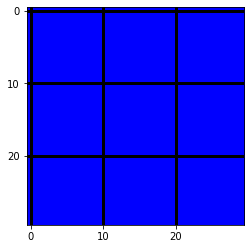

row:  28
rubric:  552
location: 60 90 330 360


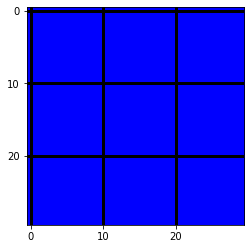

row:  28
rubric:  553
location: 60 90 360 390


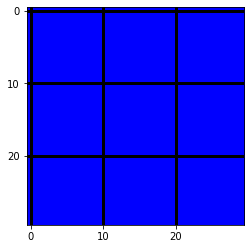

row:  28
rubric:  554
location: 60 90 390 420


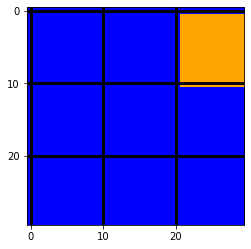

row:  28
rubric:  555
location: 60 90 420 450


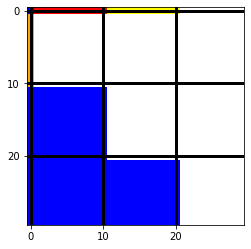

row:  28
rubric:  556
location: 60 90 450 480


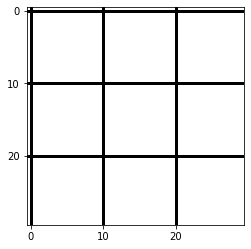

row:  28
rubric:  557
location: 60 90 480 510


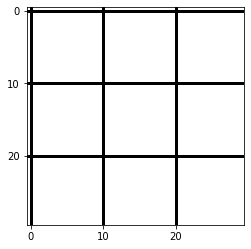

row:  28
rubric:  558
location: 60 90 510 540


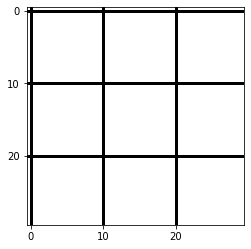

row:  28
rubric:  559
location: 60 90 540 570


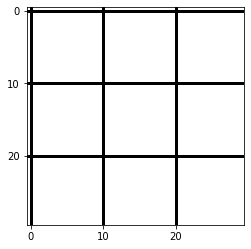

row:  28
rubric:  560
location: 60 90 570 600


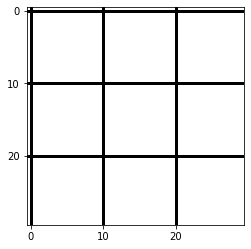

row:  29
rubric:  561
location: 30 60 1 30


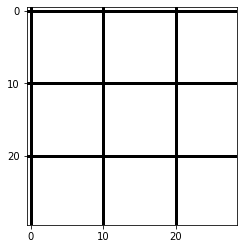

row:  29
rubric:  562
location: 30 60 30 60


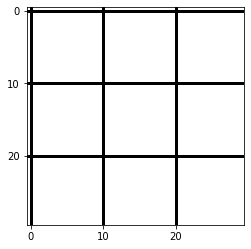

row:  29
rubric:  563
location: 30 60 60 90


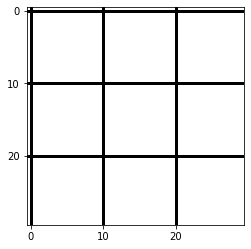

row:  29
rubric:  564
location: 30 60 90 120


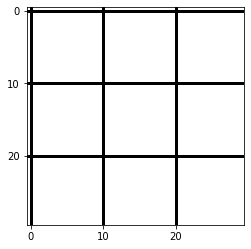

row:  29
rubric:  565
location: 30 60 120 150


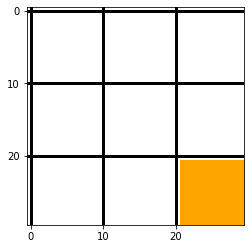

row:  29
rubric:  566
location: 30 60 150 180


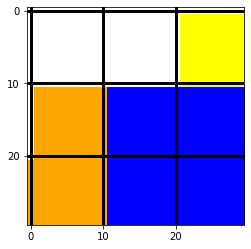

row:  29
rubric:  567
location: 30 60 180 210


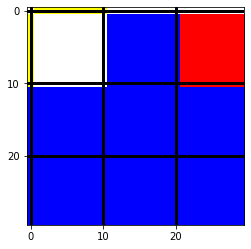

row:  29
rubric:  568
location: 30 60 210 240


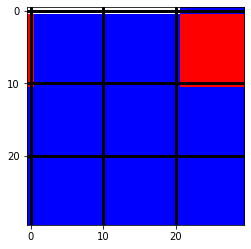

row:  29
rubric:  569
location: 30 60 240 270


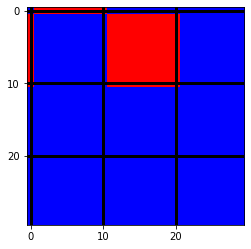

row:  29
rubric:  570
location: 30 60 270 300


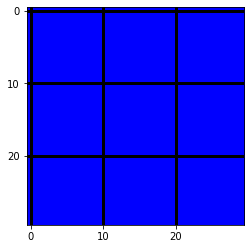

row:  29
rubric:  571
location: 30 60 300 330


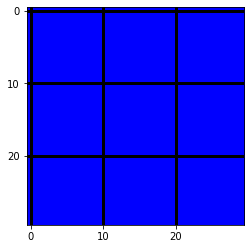

row:  29
rubric:  572
location: 30 60 330 360


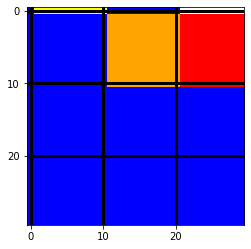

row:  29
rubric:  573
location: 30 60 360 390


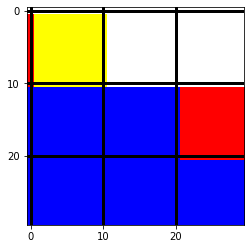

row:  29
rubric:  574
location: 30 60 390 420


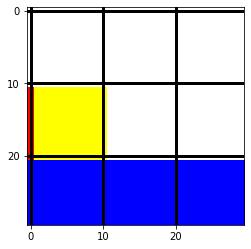

row:  29
rubric:  575
location: 30 60 420 450


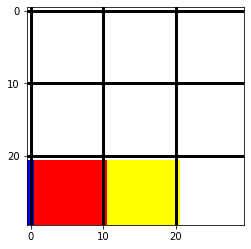

row:  29
rubric:  576
location: 30 60 450 480


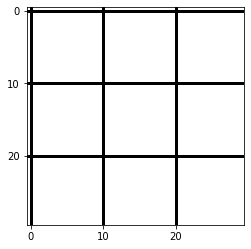

row:  29
rubric:  577
location: 30 60 480 510


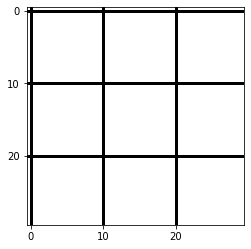

row:  29
rubric:  578
location: 30 60 510 540


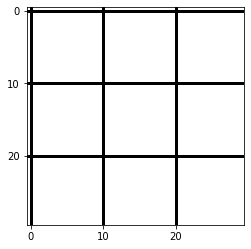

row:  29
rubric:  579
location: 30 60 540 570


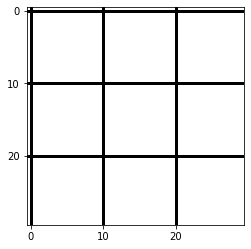

row:  29
rubric:  580
location: 30 60 570 600


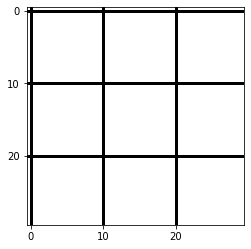

row:  30
rubric:  581
location: 0 30 1 30


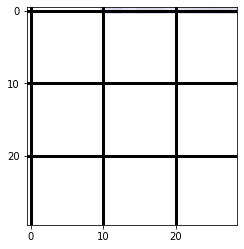

row:  30
rubric:  582
location: 0 30 30 60


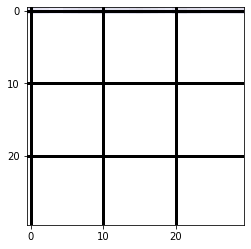

row:  30
rubric:  583
location: 0 30 60 90


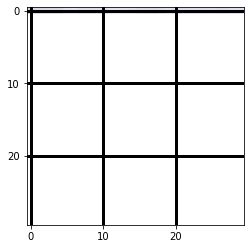

row:  30
rubric:  584
location: 0 30 90 120


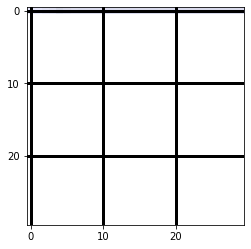

row:  30
rubric:  585
location: 0 30 120 150


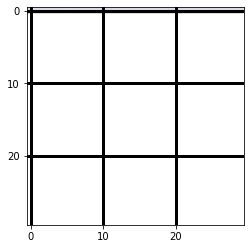

row:  30
rubric:  586
location: 0 30 150 180


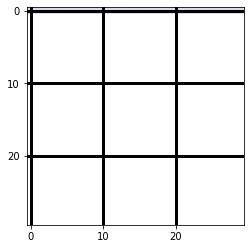

row:  30
rubric:  587
location: 0 30 180 210


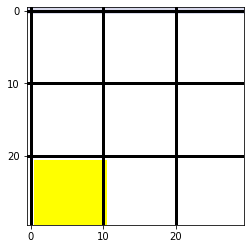

row:  30
rubric:  588
location: 0 30 210 240


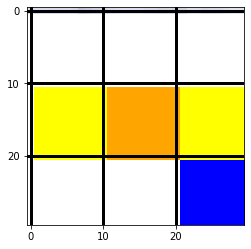

row:  30
rubric:  589
location: 0 30 240 270


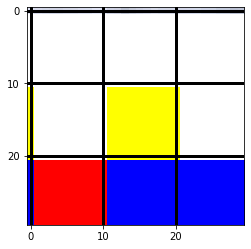

row:  30
rubric:  590
location: 0 30 270 300


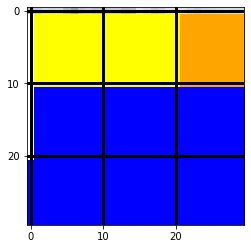

row:  30
rubric:  591
location: 0 30 300 330


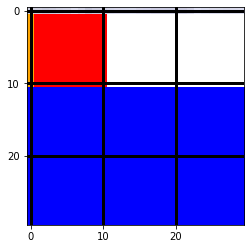

row:  30
rubric:  592
location: 0 30 330 360


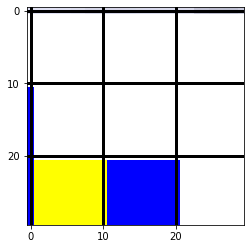

row:  30
rubric:  593
location: 0 30 360 390


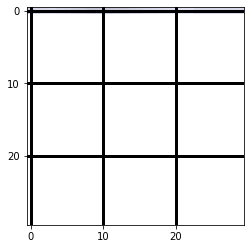

row:  30
rubric:  594
location: 0 30 390 420


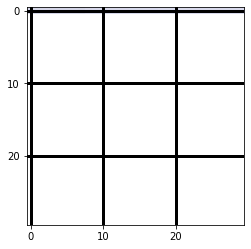

row:  30
rubric:  595
location: 0 30 420 450


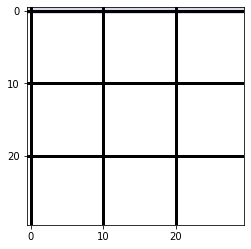

row:  30
rubric:  596
location: 0 30 450 480


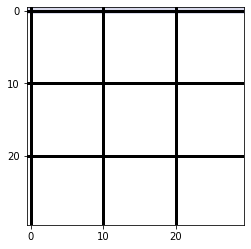

row:  30
rubric:  597
location: 0 30 480 510


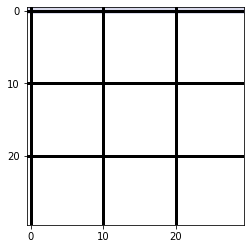

row:  30
rubric:  598
location: 0 30 510 540


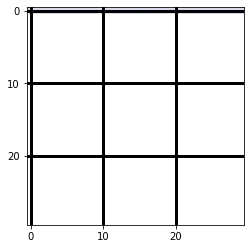

row:  30
rubric:  599
location: 0 30 540 570


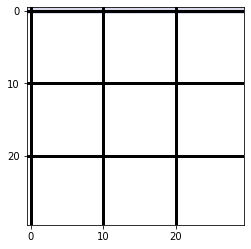

row:  30
rubric:  600
location: 0 30 570 600


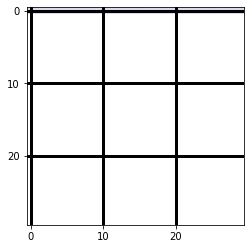

In [13]:
step()